# <center><u>Identifying Vehicles Type From Silhouette Modeling Using PCA</u></center>

### Data Description:
The data is related with Four "Corgie" model vehicles which used for the experiment: a) double decker bus, b) Cheverolet van, c) Saab 9000 d) Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
### File Name: 
vehicle.csv
### Objective:
The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.
### Analysis By:
Soumalya Biswas (Group-3)

# ============================================================

### Importing the necessary libraries to analyse data

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Train-Test data spliting library
from sklearn.model_selection import train_test_split
# Logistic Regression library
from sklearn.linear_model import LogisticRegression
# Calculate accuracy measures and confusion matrix
from sklearn import metrics
# Naive Bayes library
from sklearn.naive_bayes import GaussianNB
# KNN Classifier library
from sklearn.neighbors import KNeighborsClassifier
# zscore library
from scipy.stats import zscore
# Preprocessing library
from sklearn import preprocessing
# KFold library
from sklearn.model_selection import KFold
# Cross Validation library
from sklearn.model_selection import cross_val_score
# Support Vector Machine Classifier library
from sklearn.svm import SVC
# PCA library
from sklearn.decomposition import PCA
# Grid Searching library
from sklearn.model_selection import GridSearchCV
# label_binarize library
from sklearn.preprocessing import label_binarize
# OneVsRestClassifier library
from sklearn.multiclass import OneVsRestClassifier
# interp library
from scipy import interp
# cycle library
from itertools import cycle

<b>Comment:</b> 
* Importing the pandas library to access the dataframe.
* For graphical representation I used seaborn and matplotlib.
* Numpy library used to calculate and access array
* For spliting data used `train_test_split` function from `model_selection` library of `sklearn`
* For logistic regression using `LogisticRegression` function of `sklearn` `linear_model` library
* Using `metrics` function of `sklearn` for accuracy and confusion matrix measurements
* For Naive-Bayes model using `GaussianNB` function of `sklearn` `naive_bayes` library
* For KNN model using `KNeighborsClassifier` function of `sklearn` `neighbors` library
* For scaling the data using `preprocessing` library of `sklearn`
* For support vactor model using `SVC` function of `sklearn` `svm` library
* For standardizing the data using `zscore` function of `scipy` `stats` library
* For Priciple Component Analysis using `PCA` function of `sklearn` `decomposition` library
* For Best hyper perameter of SVC using `GridSearchCV` function of `sklearn` `model_selection` library
* For ROC graphs we used some libraries `label_binarize`, `OneVsRestClassifier`, `interp`, `cycle`

### Reading the data as a data frame

In [2]:
dataset_df = pd.read_csv('vehicle.csv')
dataset_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

<b>Comment:</b> Read the data from vehicle.csv file using pandas function called read_csv and stored the dataframe in variable named dataset_df. Also displayed the first 5 row of the data from dataframe using head function.

### Understanding of Data Attributes
  Checked the dataset separately with excel editor. Added filter in each column to understand the nature of the data.
  
<b><u>Interval Vriables :</u></b>
  * <b>compactness : </b> This column represents the (average perim)**2/area of the silhouette.
  * <b>circularity : </b> This column represents the (average radius)**2/area of the silhouette.
  * <b>distance_circularity : </b> This column represents the area/(avg. distance from border)**2 of the silhouette.
  * <b>radius_ratio : </b> This column represents the (max. radius - min. radius)/(avg. radius)	 of the silhouette.
  * <b>pr.axis_aspect_ratio : </b> This column represents the (minor axis)/(major axis) of the silhouette. 
  * <b>max.length_aspect_ratio : </b> This column represents the (length perp. max length)/(max length) of the silhouette.
  * <b>scatter_ratio : </b> This column represents the (inertia about minor axis)/(inertia about major axis) of the silhouette.
  * <b>elongatedness : </b> This column represents the area/(shrink width)**2 of the silhouette.
  * <b>pr.axis_rectangularity : </b> This column represents the area/(pr.axis length*pr.axis width) of the silhouette.
  * <b>max.length_rectangularity : </b> This column represents the area/(max.length*length perp. to this) of the silhouette.
  * <b>scaled_variance : </b> This column represents the (2nd order moment about major axis)/area of the silhouette (Major Axis).
  * <b>scaled_variance.1 : </b> This column represents the (2nd order moment about minor axis)/area of the silhouette (Minor Axis).
  * <b>scaled_radius_of_gyration : </b> This column represents the (major variance + minor variance)/area of the silhouette.
  * <b>scaled_radius_of_gyration.1 : </b> This column represents the radius of gyration of the silhouette.
  * <b>skewness_about : </b> This column represents the skewness based on axis of the silhouette.
  * <b>skewness_about.1 : </b> This column represents the skewness based on axis of the silhouette.
  * <b>skewness_about.2 : </b> This column represents the skewness based on axis of the silhouette.
  * <b>hollows_ratio : </b> This column represents the (area of hollows)/(area of bounding polygon) of the silhouette.
  
<b><u>Ordinal Categorical Variables :</u></b>
  * <b>Class : </b> That's the value where it's showing whether vehicle type is Van, Bus or Car.

### Renaming some of the attibutes for better processing

In [3]:
dataset_df.rename(columns={'pr.axis_aspect_ratio': 'pr_axis_aspect_ratio', 'max.length_aspect_ratio': 'max_length_aspect_ratio', 'pr.axis_rectangularity': 'pr_axis_rectangularity', 'max.length_rectangularity': 'max_length_rectangularity', 'scaled_variance.1': 'scaled_variance_1', 'scaled_radius_of_gyration.1': 'scaled_radius_of_gyration_1', 'skewness_about.1': 'skewness_about_1', 'skewness_about.2': 'skewness_about_2'}, inplace=True)

In [4]:
dataset_df.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr_axis_aspect_ratio  max_length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr_axis_rectangularity  max_length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance_1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about_2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

### Performing the basic EDA

* <b><u>Shape of the data</u></b>

In [5]:
rows, columns = dataset_df.shape
print(f'There are {rows} rows and {columns} columns in the dataframe.')

There are 846 rows and 19 columns in the dataframe.


* <b><u>Checking the length of the index of the data</u></b>

In [6]:
len(dataset_df.index)

846

<b>Comment:</b> Found the row size and the index sizes are equal which is 846 in the dataset against the columns size 19.

* <b><u>Checking the data type of each attribute</u></b>

In [7]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr_axis_aspect_ratio           844 non-null float64
max_length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr_axis_rectangularity         843 non-null float64
max_length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance_1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration_1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about_1               845 non-null float64
skewness_about_2               845 non-null float64
hollows_ratio    

In [8]:
dataset_df.dtypes

compactness                      int64
circularity                    float64
distance_circularity           float64
radius_ratio                   float64
pr_axis_aspect_ratio           float64
max_length_aspect_ratio          int64
scatter_ratio                  float64
elongatedness                  float64
pr_axis_rectangularity         float64
max_length_rectangularity        int64
scaled_variance                float64
scaled_variance_1              float64
scaled_radius_of_gyration      float64
scaled_radius_of_gyration_1    float64
skewness_about                 float64
skewness_about_1               float64
skewness_about_2               float64
hollows_ratio                    int64
class                           object
dtype: object

<b>Comment: </b> I can see out of 19 column there is 1 object values column and 18 Discrete Variable values column available.
 * 14 Float type (`circularity`, `distance_circularity`, `radius_ratio`, `pr_axis_aspect_ratio`, `scatter_ratio`, `elongatedness`, `pr_axis_rectangularity`, `scaled_variance`, `scaled_variance_1`, `scaled_radius_of_gyration`, `scaled_radius_of_gyration_1`, `skewness_about`, `skewness_about_1`, `skewness_about_2`)
 *  4 Integer type (`compactness`, `max_length_aspect_ratio`, `max_length_rectangularity`, `hollows_ratio`)
 * 1 Object Type (`class`)

* <b><u>Checking the unique value</u></b>

In [9]:
dataset_df.apply(lambda x: len(x.unique()))

compactness                     44
circularity                     28
distance_circularity            64
radius_ratio                   135
pr_axis_aspect_ratio            38
max_length_aspect_ratio         21
scatter_ratio                  132
elongatedness                   36
pr_axis_rectangularity          14
max_length_rectangularity       66
scaled_variance                129
scaled_variance_1              423
scaled_radius_of_gyration      144
scaled_radius_of_gyration_1     40
skewness_about                  24
skewness_about_1                42
skewness_about_2                31
hollows_ratio                   31
class                            3
dtype: int64

<b>Comment : </b> For checking the unique value I used unique function of pandas and applied through the dataframe with the helpof lambda function.
 
 * Only `class` is having multiple categorical values.
 * Rest of the attributes are having sets of numbers.

* <b><u>Checking the presence of missing values</u></b>

In [10]:
dataset_df.isnull().values.any()

True

In [11]:
dataset_df.isna().values.any()

True

In [12]:
dataset_df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr_axis_aspect_ratio           2
max_length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr_axis_rectangularity         3
max_length_rectangularity      0
scaled_variance                3
scaled_variance_1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration_1    4
skewness_about                 6
skewness_about_1               1
skewness_about_2               1
hollows_ratio                  0
class                          0
dtype: int64

In [13]:
dataset_df.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr_axis_aspect_ratio           2
max_length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr_axis_rectangularity         3
max_length_rectangularity      0
scaled_variance                3
scaled_variance_1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration_1    4
skewness_about                 6
skewness_about_1               1
skewness_about_2               1
hollows_ratio                  0
class                          0
dtype: int64

<b>Comment:</b> I found there is some missing values in the dataframe. For that I used isnull and isna function of dataframe and there I checked if any isnull or isna values present or not. I got True return. And also checked the sum of null and sum of na values on each attribute which is different than each other in our dataset.

Counts of missing values: 
* `circularity` = 5
* `distance_circularity` = 4
* `radius_ratio` = 6
* `pr_axis_aspect_ratio` = 2
* `scatter_ratio` = 1
* `elongatedness` = 1
* `pr_axis_rectangularity` = 3
* `scaled_variance` = 3
* `scaled_variance_1` = 2
* `scaled_radius_of_gyration` = 2
* `scaled_radius_of_gyration_1` = 4
* `skewness_about` = 6
* `skewness_about_1` = 1
* `skewness_about_2` = 1

Also for more evidence, if I look at the above info function output it's showing me unequal distribution of rows in between different data types. So, I can say there is some missing values in this dataset.

#### Handling missing values 

In [14]:
# Replacing missing values with median values
for col in dataset_df.columns:
    if (dataset_df[col].isna().values.any()):
        dataset_df[col] = dataset_df[col].fillna(dataset_df[col].median())

In [15]:
dataset_df.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr_axis_aspect_ratio           0
max_length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr_axis_rectangularity         0
max_length_rectangularity      0
scaled_variance                0
scaled_variance_1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration_1    0
skewness_about                 0
skewness_about_1               0
skewness_about_2               0
hollows_ratio                  0
class                          0
dtype: int64

In [16]:
dataset_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr_axis_aspect_ratio           846 non-null float64
max_length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr_axis_rectangularity         846 non-null float64
max_length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance_1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration_1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about_1               846 non-null float64
skewness_about_2               846 non-null float64
hollows_ratio    

<b>Comment:</b> After replacing the null values with median I checked whether we still have any other missing values or not. 

I found there is no more missing values in the dataframe. For that I used the sum of na values on each attribute which is 0 in our dataset. Also found the same amout of rows present now from the info() function.

* <b><u>Key Characteristics of Numerical data</u></b>

In [17]:
five_points_summury = dataset_df.describe().T
five_points_summury

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  846.0   44.823877    6.134272   33.0   40.00   
distance_circularity         846.0   82.100473   15.741569   40.0   70.00   
radius_ratio                 846.0  168.874704   33.401356  104.0  141.00   
pr_axis_aspect_ratio         846.0   61.677305    7.882188   47.0   57.00   
max_length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                846.0  168.887707   33.197710  112.0  147.00   
elongatedness                846.0   40.936170    7.811882   26.0   33.00   
pr_axis_rectangularity       846.0   20.580378    2.588558   17.0   19.00   
max_length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              846.0  188.596927   31.360427  130.0  167.00   
scaled_variance_1            846.0  439.314421  176.496341  184.0  318.25   
scaled_radius_of_gyration    846.0  174.706856   32.546277  109.0  149.00   
scaled_radius_of_gyration_1  846.0   72.443262    7.468734   59.0   67.00   
skewness_about               846.0    6.361702    4.903244    0.0    2.00   
skewness_about_1             846.0   12.600473    8.930962    0.0    5.00   
skewness_about_2             846.0  188.918440    6.152247  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%     75%     max  
compactness                   93.0  100.00   119.0  
circularity                   44.0   49.00    59.0  
distance_circularity          80.0   98.00   112.0  
radius_ratio                 167.0  195.00   333.0  
pr_axis_aspect_ratio          61.0   65.00   138.0  
max_length_aspect_ratio        8.0   10.00    55.0  
scatter_ratio                157.0  198.00   265.0  
elongatedness                 43.0   46.00    61.0  
pr_axis_rectangularity        20.0   23.00    29.0  
max_length_rectangularity    146.0  159.00   188.0  
scaled_variance              179.0  217.00   320.0  
scaled_variance_1            363.5  586.75  1018.0  
scaled_radius_of_gyration    173.5  198.00   268.0  
scaled_radius_of_gyration_1   71.5   75.00   135.0  
skewness_about                 6.0    9.00    22.0  
skewness_about_1              11.0   19.00    41.0  
skewness_about_2             188.0  193.00   206.0  
hollows_ratio                197.0  201.00   211.0

* Mean and the median is almost same for the `compactness, circularity, pr_axis_aspect_ratio, max_length_aspect_ratio, pr_axis_rectangularity, scaled_radius_of_gyration, scaled_radius_of_gyration_1, skewness_about, skewness_about_2` so we can say it is approximately normally distributed.
* `distance_circularity, radius_ratio, scatter_ratio, max_length_rectangularity, scaled_variance, scaled_variance_1, skewness_about_1` are having much values at the max portion, I can say it is skewed towards right side.
* `elongatedness, hollows_ratio` are having much values at the min portion, I can say it is skewed towards left side.

* <b><u>5 point summary of numerical attributes</u></b>

In [18]:
five_points_summury[['min','25%','50%','75%','max']]

min     25%    50%     75%     max
compactness                   73.0   87.00   93.0  100.00   119.0
circularity                   33.0   40.00   44.0   49.00    59.0
distance_circularity          40.0   70.00   80.0   98.00   112.0
radius_ratio                 104.0  141.00  167.0  195.00   333.0
pr_axis_aspect_ratio          47.0   57.00   61.0   65.00   138.0
max_length_aspect_ratio        2.0    7.00    8.0   10.00    55.0
scatter_ratio                112.0  147.00  157.0  198.00   265.0
elongatedness                 26.0   33.00   43.0   46.00    61.0
pr_axis_rectangularity        17.0   19.00   20.0   23.00    29.0
max_length_rectangularity    118.0  137.00  146.0  159.00   188.0
scaled_variance              130.0  167.00  179.0  217.00   320.0
scaled_variance_1            184.0  318.25  363.5  586.75  1018.0
scaled_radius_of_gyration    109.0  149.00  173.5  198.00   268.0
scaled_radius_of_gyration_1   59.0   67.00   71.5   75.00   135.0
skewness_about                 0.0    2.00    6.0    9.00    22.0
skewness_about_1               0.0    5.00   11.0   19.00    41.0
skewness_about_2             176.0  184.00  188.0  193.00   206.0
hollows_ratio                181.0  190.25  197.0  201.00   211.0

<b>Comment:</b> I used describe function of dataframe to determine the 5 point summary of numerical attributes. Applied transpose to the result and stored in a variable called five_points_summury.

Here We can see the key characteristics of our numerical datas like mean, standard deviation  of attributes. 

Then I displayed the 5 point summury where some important insights I found like min and max values of numerical attributes which will help me in my next analysis.



### Outlier Checking

Used seaborn boxplot function to observe and display the outliers

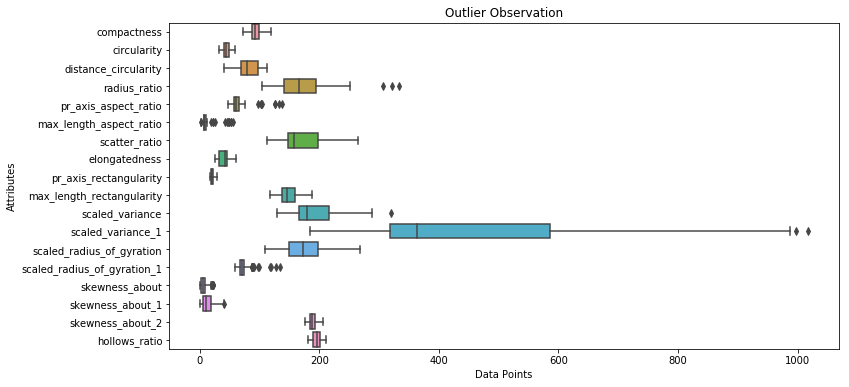

In [19]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dataset_df, orient='h')
plt.title('Outlier Observation')
plt.xlabel('Data Points')
plt.ylabel('Attributes')
plt.show()

<b>Comment: </b> From the above ploting I can say `radius_ratio`, `pr_axis_aspect_ratio`, `max_length_aspect_ratio`, `scaled_variance`, `scaled_variance_1` and `scaled_radius_of_gyration_1` column are having clear outliers. But few columns like `skewness_about`, `skewness_about_1` are not clearly display whether those are having the outliers or not. Let see those separately.

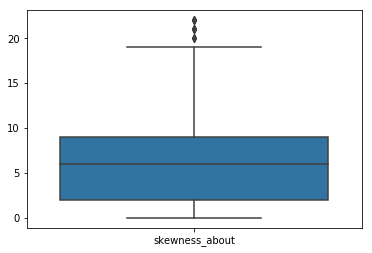

In [20]:
# Boxplot implementation for `skewness_about`
sns.boxplot(data=dataset_df[['skewness_about']])
plt.show()

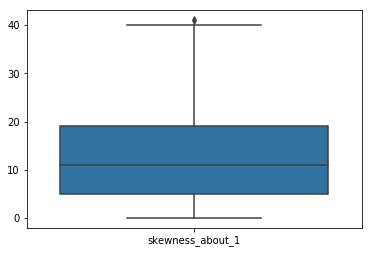

In [21]:
# Boxplot implementation for `skewness_about`
sns.boxplot(data=dataset_df[['skewness_about_1']])
plt.show()

<b>Comment: </b>  Above three graph is the representation of `skewness_about`, `skewness_about_1` column boxplot graph respectively. All of them are having clear outliers.

<u>From above individual box plot graph,</u><br>
 a. Bottom black horizontal line of box plot is minimum value.<br>
 b. First black horizontal line of rectangle shape of box plot is First quartile or 25%<br>
 c. Second black horizontal line of rectangle shape of box plot is Second quartile or 50% or median.<br>
 d. Third black horizontal line of rectangle shape of box plot is third quartile or 75%<br>
 e. Top black horizontal line of rectangle shape of box plot is maximum value.<br>
 f. Small diamond shape of box plot is <b>outlier data</b>.

### Datatype conversion

Now I'm going to change the datatype from object to category

In [22]:
# Loop through all columns in the dataframe
for feature in dataset_df.columns:
    # Only apply for columns with categorical strings
    if dataset_df[feature].dtype == 'object':
        # Replace strings with an integer
        dataset_df[feature] = pd.Categorical(dataset_df[feature])
dataset_df.dtypes

compactness                       int64
circularity                     float64
distance_circularity            float64
radius_ratio                    float64
pr_axis_aspect_ratio            float64
max_length_aspect_ratio           int64
scatter_ratio                   float64
elongatedness                   float64
pr_axis_rectangularity          float64
max_length_rectangularity         int64
scaled_variance                 float64
scaled_variance_1               float64
scaled_radius_of_gyration       float64
scaled_radius_of_gyration_1     float64
skewness_about                  float64
skewness_about_1                float64
skewness_about_2                float64
hollows_ratio                     int64
class                          category
dtype: object

* <b>Unique value checking</b>

In [23]:
print('------------ Class ------------')
print(dataset_df['class'].value_counts())

------------ Class ------------
car    429
bus    218
van    199
Name: class, dtype: int64


#### Replacing the the string values of Class Attribute

In [24]:
replaceStruct = {
    "class": {"van": 0, "car": 1, "bus": 2}
}

In [25]:
dataset_df=dataset_df.replace(replaceStruct)
dataset_df.head(10)

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   
5          107         44.0                 106.0         172.0   
6           97         43.0                  73.0         173.0   
7           90         43.0                  66.0         157.0   
8           86         34.0                  62.0         140.0   
9           93         44.0                  98.0         167.0   

   pr_axis_aspect_ratio  max_length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   
5                  50.0                        6          255.0   
6                  65.0                        6          153.0   
7                  65.0                        9          137.0   
8                  61.0                        7          122.0   
9                  62.0                       11          183.0   

   elongatedness  pr_axis_rectangularity  max_length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   
5           26.0                    28.0                        169   
6           42.0                    19.0                        143   
7           48.0                    18.0                        146   
8           54.0                    17.0                        127   
9           36.0                    22.0                        146   

   scaled_variance  scaled_variance_1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   
5            280.0              957.0                      264.0   
6            176.0              361.0                      172.0   
7            162.0              281.0                      164.0   
8            141.0              223.0                      112.0   
9            202.0              505.0                      152.0   

   scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   
5                         85.0             5.0               9.0   
6                         66.0            13.0               1.0   
7                         67.0             3.0               3.0   
8                         64.0             2.0              14.0   
9                         64.0             4.0              14.0   

   skewness_about_2  hollows_ratio  class  
0             187.0            197      0  
1             189.0            199      0  
2             188.0            196      1  
3             199.0            207      0  
4             180.0        

### Relation between Individual attributes

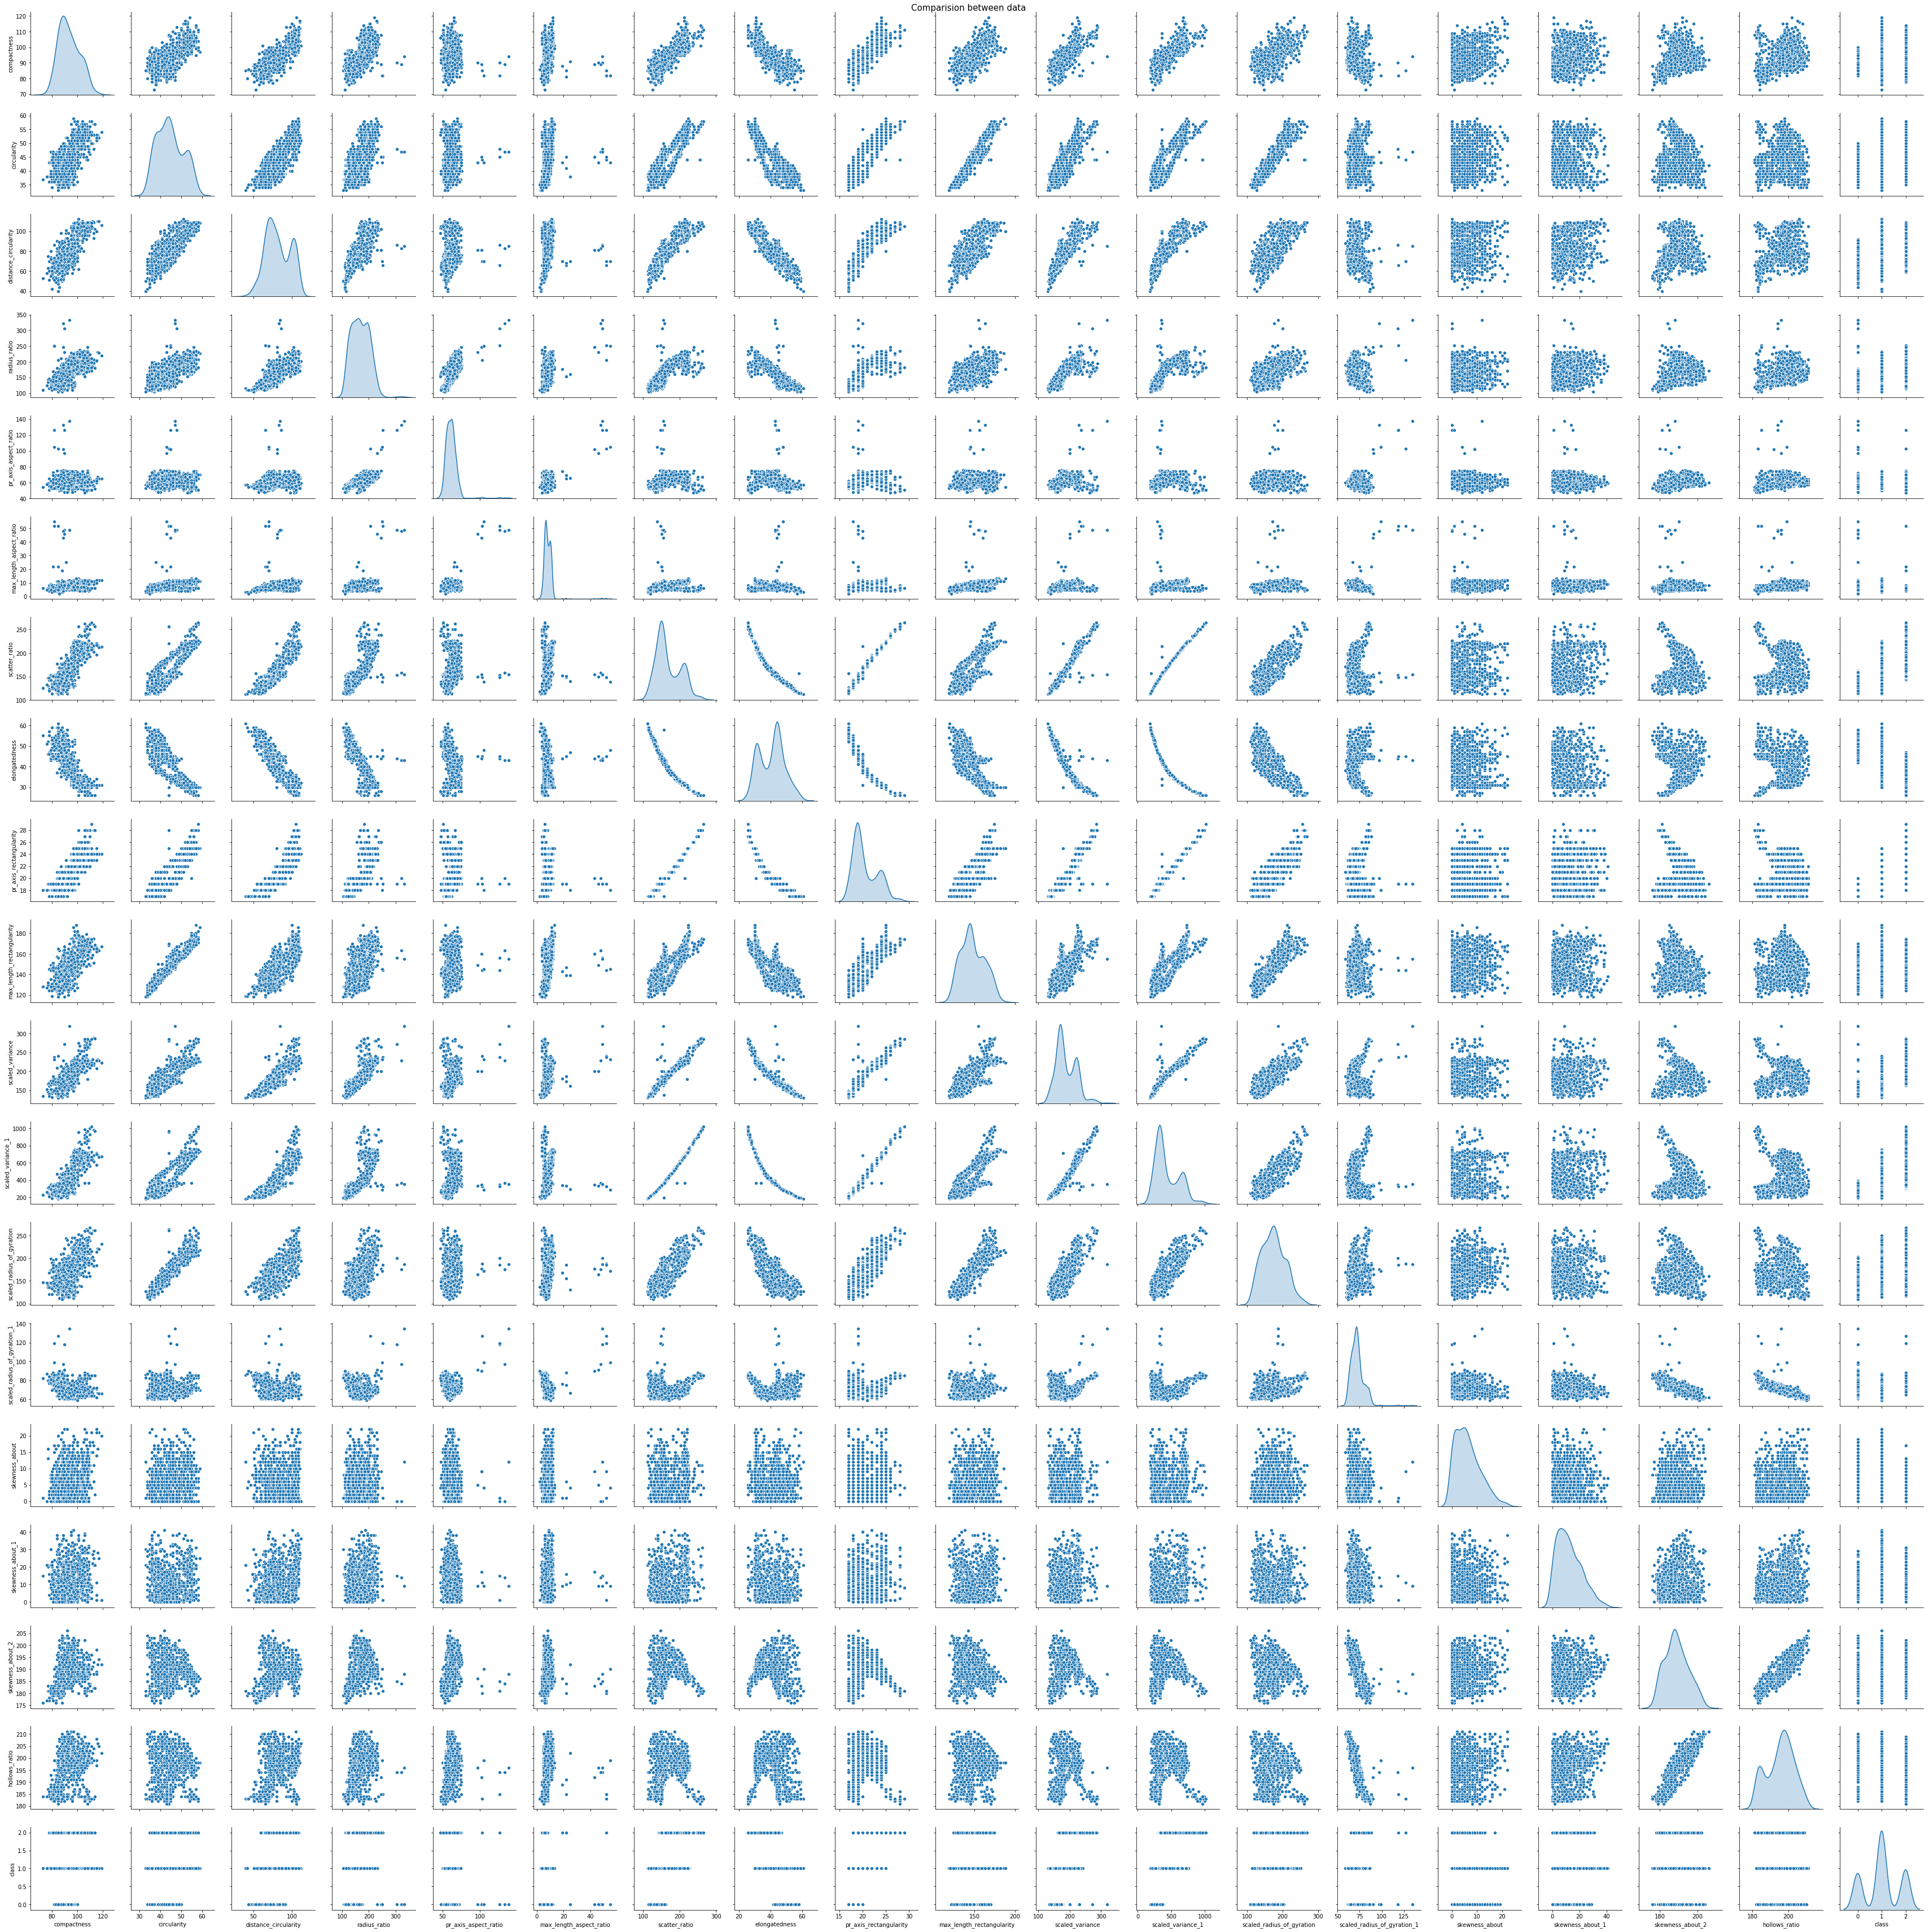

In [26]:
sns.pairplot(dataset_df, diag_kind='kde')
plt.suptitle('Comparision between data', y=1,size=15)
plt.show()

<b> Comment: </b> I used seaborn pairplot function to check the relation between individual attributes.

<b> Few interesting facts: </b>
- `compactness` have good possitive linear corelation with `circularity`, `distance_circularity`,  `scatter_ratio`, `pr_axis_rectangularity`, `max_length_rectangularity`, `scaled_variance`, `scaled_variance_1`, `scaled_radius_of_gyration`.
- `circularity` have good possitive linear corelation with `distance_circularity`, `scatter_ratio`,  `pr_axis_rectangularity`, `max_length_rectangularity`, `scaled_variance`, `scaled_variance_1`, `scaled_radius_of_gyration`.
- `scatter_ratio` have good possitive linear corelation with `pr_axis_rectangularity`, `max_length_rectangularity`, `scaled_variance`, `scaled_variance_1`, `scaled_radius_of_gyration`.
- `elongatedness` have all nagative linear corelation with `pr_axis_rectangularity`, `max_length_rectangularity`, `scaled_variance`, `scaled_variance_1`, `scaled_radius_of_gyration`.

- Relationship between other columns with `radius_ratio`, `pr_axis_aspect_ratio`, `max_length_aspect_ratio` and `scaled_radius_of_gyration_1` are having lots of outliers as well.
- Rest of the relation between other individual attributes are mostly formed cloud shape or symmetrical shape.


#### Vehicle Types (Class Column)

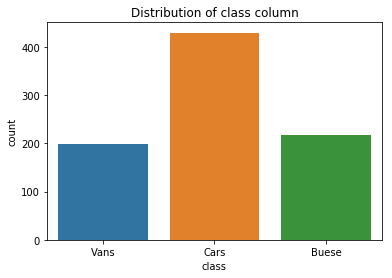

In [27]:
# class Column distribution

ax_type = sns.countplot(dataset_df['class'])
plt.title('Distribution of class column')
ax_type.set_xticklabels(["Vans","Cars","Buese"])
plt.show()

<b> Comment: </b> I can clearly see that our target variable is having binary values which representing the vehicle types. And count of the cars is more than vans and buses with obvious reason as we have two types of cars in the dataset.

In [28]:
vahicle_counts = pd.DataFrame({'Labels': ['Car','Bus','Van'], 'Class': dataset_df["class"].value_counts(),'Percentage (%)': dataset_df["class"].value_counts(normalize=True).mul(100)})
vahicle_counts

Labels  Class  Percentage (%)
1    Car    429       50.709220
2    Bus    218       25.768322
0    Van    199       23.522459

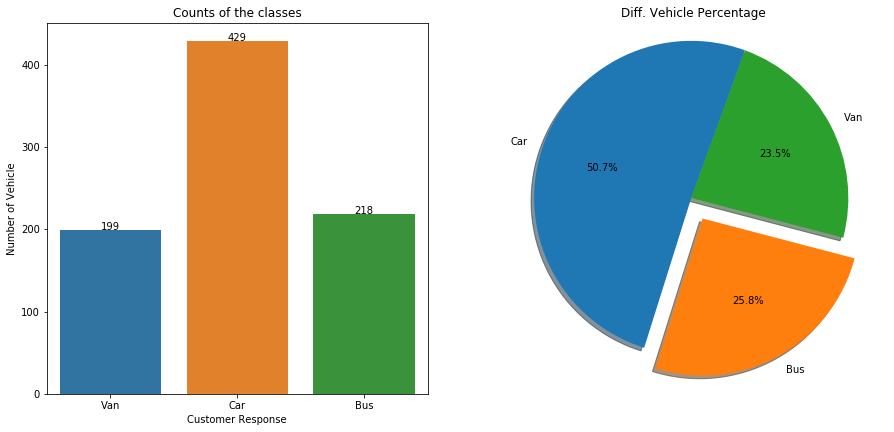

In [29]:
fig1 = plt.figure(figsize=(15,15))
fig1.add_subplot(2,2,1)
ax = sns.countplot(x="class", data=dataset_df)
plt.title('Counts of the classes')
plt.xlabel('Customer Response')
plt.ylabel('Number of Vehicle')
ax.set_xticklabels(["Van","Car","Bus"])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2., height + 0.3,height ,ha="center")

fig1.add_subplot(2,2,2)
explode = (0, 0.15, 0)
plt.pie(vahicle_counts["Class"], explode=explode, labels=vahicle_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
plt.axis('equal')
plt.title("Diff. Vehicle Percentage")
plt.show()

From the above graphs, clearly I can see the no. of vehicles which is Vans-199, Cars-429, Buses-218. I used seaborn countplot function to display that.

### Comparing other attributes against class column  to check the influence

<b>Visual presentation of the relation between compactness, circularity and distance_circularity</b>

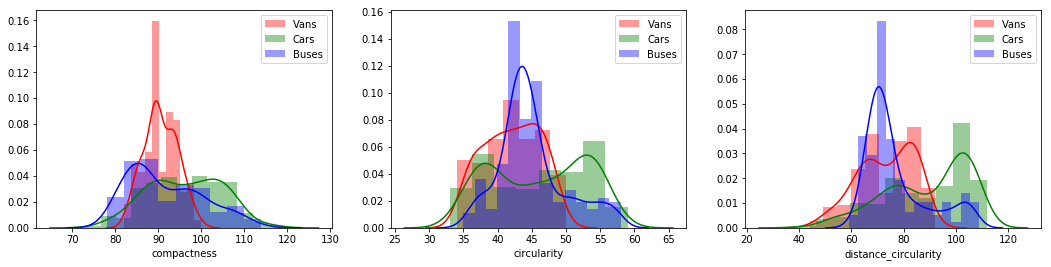

In [30]:
fig1 = plt.figure(figsize=(18,4))
fig1.add_subplot(1,3,1)
sns.distplot( dataset_df[dataset_df['class'] == 0]['compactness'], color = 'r')
sns.distplot( dataset_df[dataset_df['class'] == 1]['compactness'], color = 'g')
sns.distplot( dataset_df[dataset_df['class'] == 2]['compactness'], color = 'b')
plt.gca().legend(('Vans','Cars','Buses'))
fig1.add_subplot(1,3,2)
sns.distplot( dataset_df[dataset_df['class'] == 0]['circularity'], color = 'r')
sns.distplot( dataset_df[dataset_df['class'] == 1]['circularity'], color = 'g')
sns.distplot( dataset_df[dataset_df['class'] == 2]['circularity'], color = 'b')
plt.gca().legend(('Vans','Cars','Buses'))
fig1.add_subplot(1,3,3)
sns.distplot( dataset_df[dataset_df['class'] == 0]['distance_circularity'], color = 'r')
sns.distplot( dataset_df[dataset_df['class'] == 1]['distance_circularity'], color = 'g')
sns.distplot( dataset_df[dataset_df['class'] == 2]['distance_circularity'], color = 'b')
plt.gca().legend(('Vans','Cars','Buses'))
plt.show()

<b> Comment: </b> The above graph diplaying the comparison of compactness, circularity and distance_circularity attribute with class column. 

* For compactness I can see distribution of the vans have the highest peak among other vehicles and it lies in beetween 80-100.
* For circularity I can see distribution of the buses have the highest peak and vans have second most highest peak among other vehicles and it lies in beetween 35-58.
* For distance_circularity I can see distribution of the buses have the highest peak among other vehicles and it lies in beetween 60-110.

<b>Visual presentation of the relation between pr_axis_aspect_ratio, pr_axis_rectangularity, max_length_aspect_ratio and max_length_rectangularity</b>

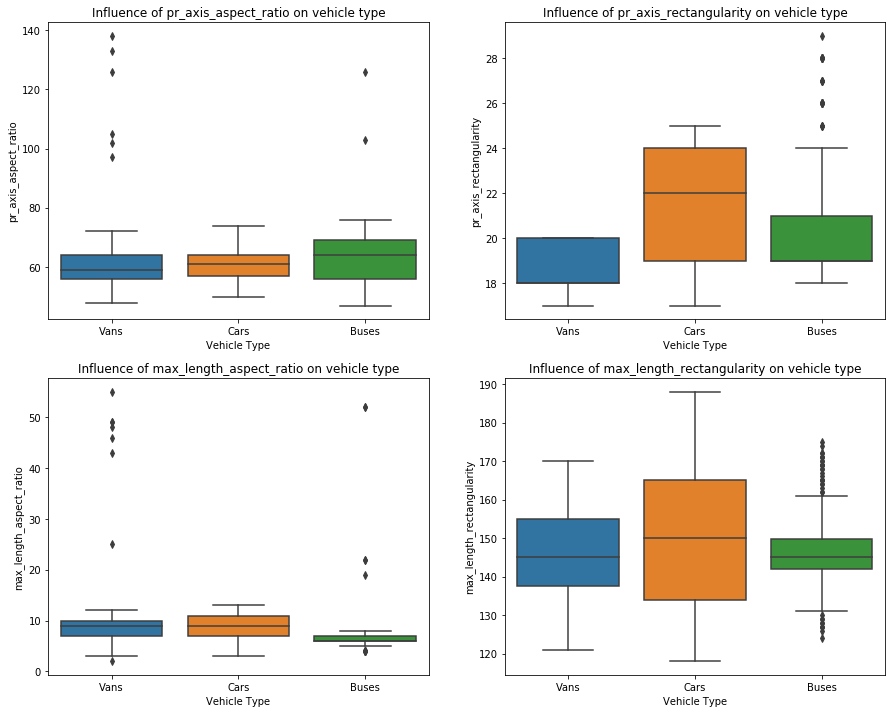

In [31]:
fig1 = plt.figure(figsize=(15,12))
fig1.add_subplot(2,2,1)
compFig2 = sns.boxplot(x='class',y='pr_axis_aspect_ratio',data=dataset_df)
plt.title('Influence of pr_axis_aspect_ratio on vehicle type')
plt.xlabel('Vehicle Type')
compFig2.set_xticklabels(["Vans","Cars","Buses"])
fig1.add_subplot(2,2,2)
compFig3 = sns.boxplot(x='class',y='pr_axis_rectangularity',data=dataset_df)
plt.title('Influence of pr_axis_rectangularity on vehicle type')
plt.xlabel('Vehicle Type')
compFig3.set_xticklabels(["Vans","Cars","Buses"])
fig1.add_subplot(2,2,3)
compFig4 = sns.boxplot(x='class',y='max_length_aspect_ratio',data=dataset_df)
plt.title('Influence of max_length_aspect_ratio on vehicle type')
plt.xlabel('Vehicle Type')
compFig4.set_xticklabels(["Vans","Cars","Buses"])
fig1.add_subplot(2,2,4)
compFig5 = sns.boxplot(x='class',y='max_length_rectangularity',data=dataset_df)
plt.title('Influence of max_length_rectangularity on vehicle type')
plt.xlabel('Vehicle Type')
compFig5.set_xticklabels(["Vans","Cars","Buses"])
plt.show()

<b> Comment: </b> The above graphs represents the influence of `pr_axis_aspect_ratio`, `pr_axis_rectangularity`, `max_length_aspect_ratio` and `max_length_rectangularity` column over vehicle types.

* Cars don't have any outliers for those four attibutes. 
* But buses and vans are having outliers for both pr_axis_aspect_ratio and max_length_aspect_ratio.
* Only buses are having outliers for pr_axis_rectangularity and max_length_rectangularity.

<b>Visual presentation of the relation between scaled_variance, scaled_variance_1, scaled_radius_of_gyration and scaled_radius_of_gyration_1</b>

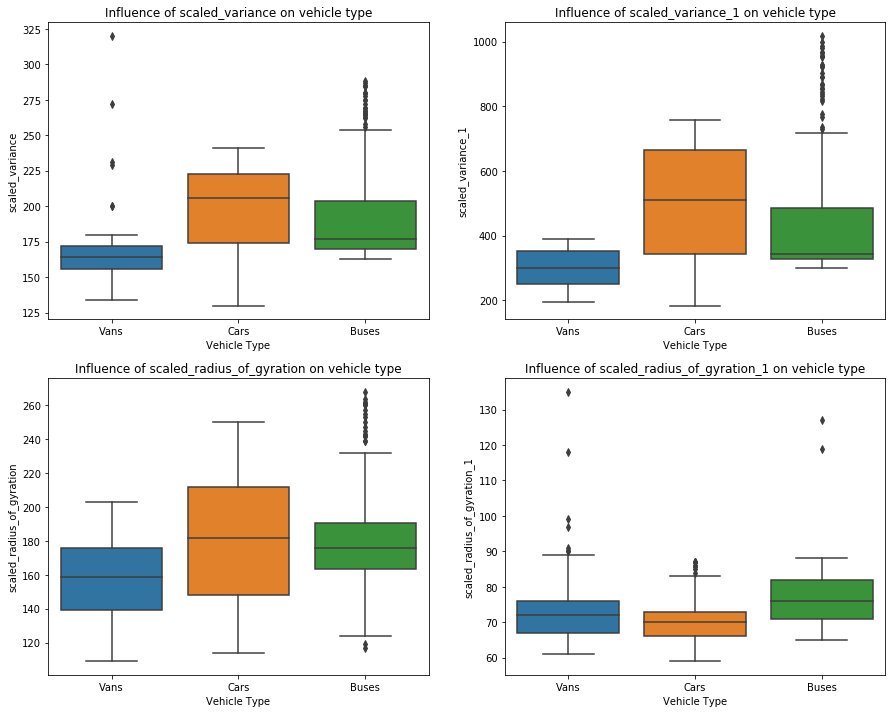

In [32]:
fig1 = plt.figure(figsize=(15,12))
fig1.add_subplot(2,2,1)
compFig2 = sns.boxplot(x='class',y='scaled_variance',data=dataset_df)
plt.title('Influence of scaled_variance on vehicle type')
plt.xlabel('Vehicle Type')
compFig2.set_xticklabels(["Vans","Cars","Buses"])
fig1.add_subplot(2,2,2)
compFig3 = sns.boxplot(x='class',y='scaled_variance_1',data=dataset_df)
plt.title('Influence of scaled_variance_1 on vehicle type')
plt.xlabel('Vehicle Type')
compFig3.set_xticklabels(["Vans","Cars","Buses"])
fig1.add_subplot(2,2,3)
compFig4 = sns.boxplot(x='class',y='scaled_radius_of_gyration',data=dataset_df)
plt.title('Influence of scaled_radius_of_gyration on vehicle type')
plt.xlabel('Vehicle Type')
compFig4.set_xticklabels(["Vans","Cars","Buses"])
fig1.add_subplot(2,2,4)
compFig5 = sns.boxplot(x='class',y='scaled_radius_of_gyration_1',data=dataset_df)
plt.title('Influence of scaled_radius_of_gyration_1 on vehicle type')
plt.xlabel('Vehicle Type')
compFig5.set_xticklabels(["Vans","Cars","Buses"])
plt.show()

<b> Comment: </b> The above graphs represents the influence of `scaled_variance`, `scaled_variance_1`, `scaled_radius_of_gyration` and `scaled_radius_of_gyration_1` column over vehicle types.

* Here is also Cars only have the outliers for those four attibutes.
* But buses and vans are having outliers for both scaled_variance and scaled_radius_of_gyration_1.
* Only buses are having outliers for scaled_variance_1 and scaled_radius_of_gyration.

<b>Visual presentation of the relation between skewness_about, skewness_about_1 and skewness_about_2</b>

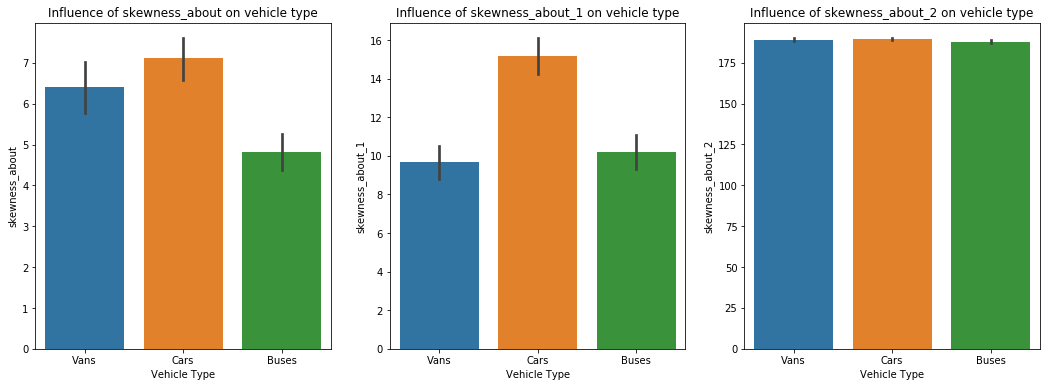

In [33]:
fig1 = plt.figure(figsize=(18,6))
fig1.add_subplot(1,3,1)
compFig1 = sns.barplot(x='class',y='skewness_about',data=dataset_df)
plt.title('Influence of skewness_about on vehicle type')
plt.xlabel('Vehicle Type')
compFig1.set_xticklabels(["Vans","Cars","Buses"])

fig1.add_subplot(1,3,2)

compFig2 = sns.barplot(x='class',y='skewness_about_1',data=dataset_df)
plt.title('Influence of skewness_about_1 on vehicle type')
plt.xlabel('Vehicle Type')
compFig2.set_xticklabels(["Vans","Cars","Buses"])

fig1.add_subplot(1,3,3)

compFig3 = sns.barplot(x='class',y='skewness_about_2',data=dataset_df)
plt.title('Influence of skewness_about_2 on vehicle type')
plt.xlabel('Vehicle Type')
compFig3.set_xticklabels(["Vans","Cars","Buses"])
    
plt.show()

<b> Comment: </b> Above graphs showing the influence on vehicle type over `skewness_about`, `skewness_about_1` and `skewness_about_2` column respectively.
 
* Cars is having maximum skewness over skewness_about and skewness_about_1.
* For the skewness_about_2 the skewness is same over the vehicle type.

<b>Visual presentation of the relation between radius_ratio, scatter_ratio, elongatedness and hollows_ratio</b>

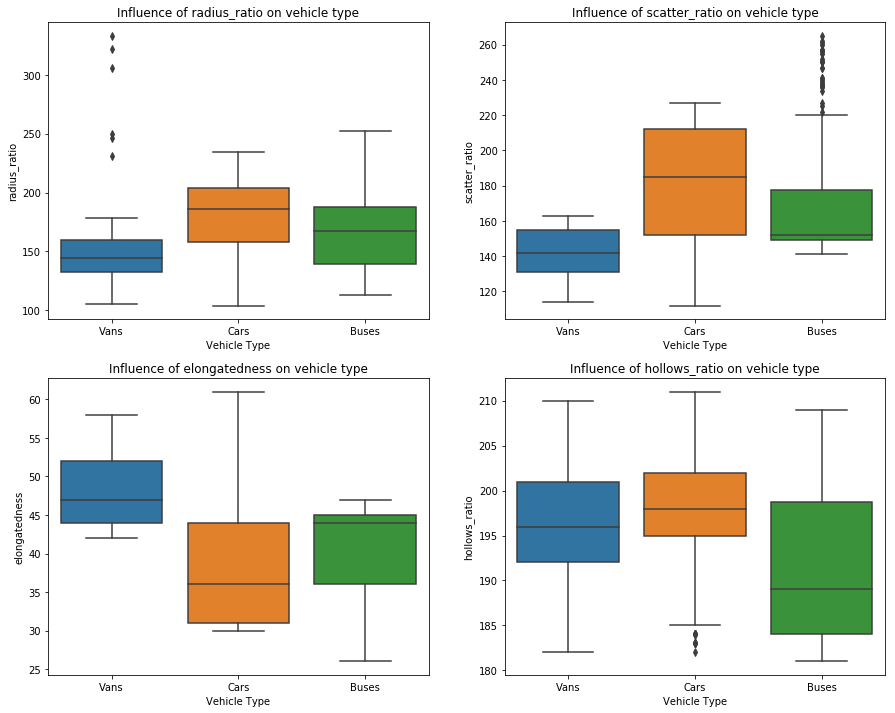

In [34]:
fig1 = plt.figure(figsize=(15,12))
fig1.add_subplot(2,2,1)
compFig2 = sns.boxplot(x='class',y='radius_ratio',data=dataset_df)
plt.title('Influence of radius_ratio on vehicle type')
plt.xlabel('Vehicle Type')
compFig2.set_xticklabels(["Vans","Cars","Buses"])
fig1.add_subplot(2,2,2)
compFig3 = sns.boxplot(x='class',y='scatter_ratio',data=dataset_df)
plt.title('Influence of scatter_ratio on vehicle type')
plt.xlabel('Vehicle Type')
compFig3.set_xticklabels(["Vans","Cars","Buses"])
fig1.add_subplot(2,2,3)
compFig4 = sns.boxplot(x='class',y='elongatedness',data=dataset_df)
plt.title('Influence of elongatedness on vehicle type')
plt.xlabel('Vehicle Type')
compFig4.set_xticklabels(["Vans","Cars","Buses"])
fig1.add_subplot(2,2,4)
compFig5 = sns.boxplot(x='class',y='hollows_ratio',data=dataset_df)
plt.title('Influence of hollows_ratio on vehicle type')
plt.xlabel('Vehicle Type')
compFig5.set_xticklabels(["Vans","Cars","Buses"])
plt.show()

<b> Comment: </b> The above graphs represents the influence of `radius_ratio`, `scatter_ratio`, `elongatedness` and `hollows_ratio` column over vehicle types.

* Vans have the outliers for `radius_ratio` and `scatter_ratio` attibutes and cars are having outliers in `hollows_ratio` attibutes.
* For vans range of data lies between 44 - 52 approx in `elongatedness`attribute.
* Cars are having more `scatter_ratio` values as well as Buses are having more data values in `hollows_ratio`.

### Corelation checking

* Checking the corelation using pandas corr() function

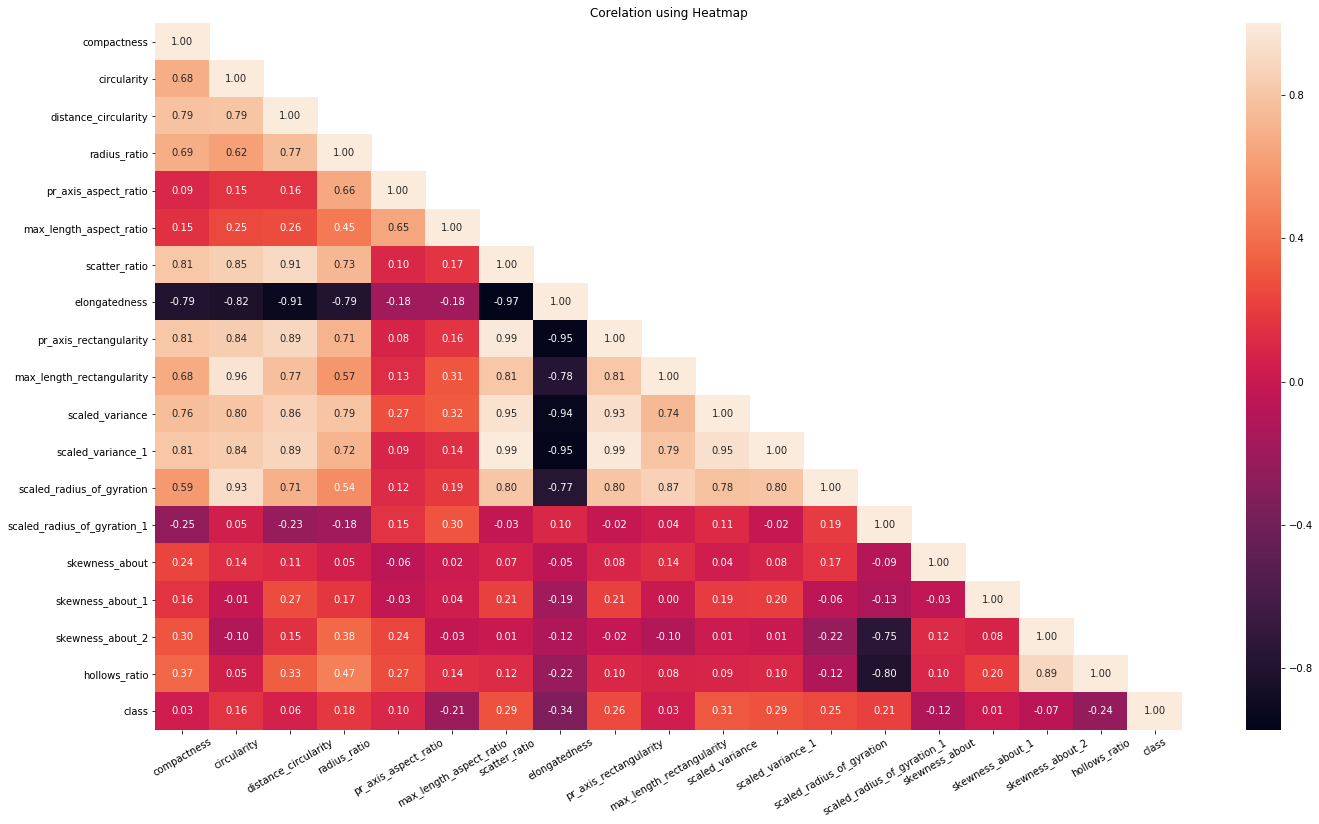

In [35]:
corr = dataset_df.corr()
plt.figure(figsize=(23,13))
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
hmap = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
hmap.set_xticklabels(hmap.get_xticklabels(), rotation=30)
plt.title('Corelation using Heatmap')
plt.show()

<b>Comment: </b> 

This 'Corgie' dataset providing us some interesting facts about the relation between the attributes which is quite well correlated.

<u>There is positively related attributes with more than 90% corelation.</u>
* `scatter_ratio` and `distance_circularity` are having corelation of `0.91` .
* `pr_axis_rectangularity` and `scatter_ratio` are having corelation of `0.99` .
* `max_length_rectangularity` and `circularity` are having corelation of `0.96` .
* `scatter_ratio` and `scaled_variance` are having corelation of `0.95` .
* `scaled_variance` and `pr_axis_rectangularity` are having corelation of `0.93` .
* `scatter_ratio` and `scaled_variance_1` are having corelation of `0.99` .
* `scaled_variance_1` and `pr_axis_rectangularity` are having corelation of `0.99` .
* `scaled_variance` and `scaled_variance_1` are having corelation of `0.95` .
* `scaled_radius_of_gyration` and `circularity` are having corelation of `0.93` .


<u>There is nagatevely related attributes with more than 90% corelation.</u>
* `elongatedness` and `distance_circularity` are having corelation of `-0.91` .
* `scatter_ratio` and `elongatedness` are having corelation of `-0.97` .
* `elongatedness` and `pr_axis_rectangularity` are having corelation of `-0.95` .
* `elongatedness` and `scaled_variance` are having corelation of `-0.94` .
* `elongatedness` and `scaled_variance_1` are having corelation of `-0.95` .


<b>If I manually evaluate the dimension reduction process by looking at the corelation between the independant attributes, <br>I can choose atleast 8 attributes out of 9 as they are highly corelated.  Those 9 attributes are -</b>
   * `scatter_ratio`, 
   * `distance_circularity`, 
   * `pr_axis_rectangularity`, 
   * `max_length_rectangularity`, 
   * `circularity`, 
   * `scaled_variance`, 
   * `scaled_variance_1`, 
   * `scaled_radius_of_gyration` 
   * `elongatedness`

### Removing Outliers

In [36]:
def outlier_detect(df):
    for i in df.describe().columns:
        Q1=df.describe().at['25%',i]
        Q3=df.describe().at['75%',i]
        IQR=Q3 - Q1
        LTV=Q1 - 1.5 * IQR
        UTV=Q3 + 1.5 * IQR
        x=np.array(df[i])
        p=[]
        for j in x:
            if j < LTV or j>UTV:
                p.append(df[i].median())
            else:
                p.append(j)
        df[i]=p
    return df

In [37]:
dataset_df = outlier_detect(dataset_df)

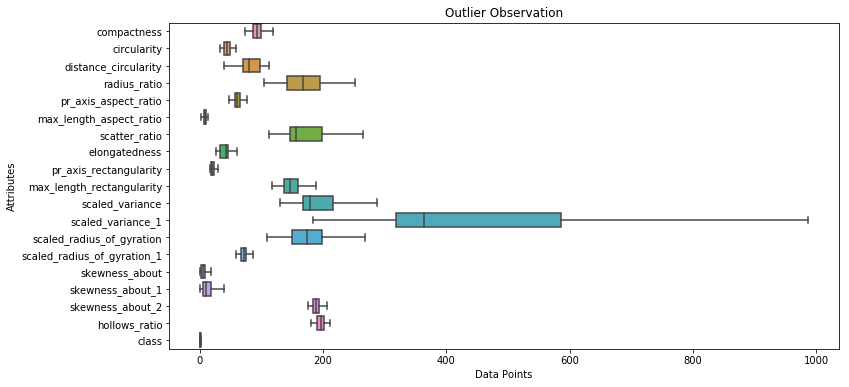

In [38]:
plt.figure(figsize=(12,6))
sns.boxplot(data=dataset_df, orient='h')
plt.title('Outlier Observation')
plt.xlabel('Data Points')
plt.ylabel('Attributes')
plt.show()

In [39]:
dataset_df.index

RangeIndex(start=0, stop=846, step=1)

<b>Comment: </b> Above code I used to detect the outliers and remove it. For that I used a function named `outlier_detect` which creates the lower and upper limit and accordingly I replaced the outliers with median value. 

After the process I varified if the outliers removed or not. So found outliers removed completely.

<hr>

## Data Preprocessing

In [40]:
# Creating the independent data separate
X_set = dataset_df.drop('class', axis=1)
# Creating the dependent data separate
y_set = dataset_df['class']

* Applying z-score to standardizing the data

In [41]:
XScaled = X_set.apply(zscore)
XScaled.head()

compactness  circularity  distance_circularity  radius_ratio  \
0     0.160580     0.518073              0.057177      0.300945   
1    -0.325470    -0.623732              0.120741     -0.850666   
2     1.254193     0.844303              1.519141      1.265808   
3    -0.082445    -0.623732             -0.006386     -0.290423   
4    -1.054545    -0.134387             -0.769150      1.141310   

   pr_axis_aspect_ratio  max_length_aspect_ratio  scatter_ratio  \
0              1.933135                 0.912212      -0.207598   
1             -0.740596                 0.427456      -0.599423   
2              0.863642                 0.912212       1.148719   
3              0.328896                 0.427456      -0.750125   
4             -0.027601                -0.057300      -0.599423   

   elongatedness  pr_axis_rectangularity  max_length_rectangularity  \
0       0.136262               -0.224342                   0.758332   
1       0.520519               -0.610886                  -0.344578   
2      -1.144597                0.935290                   0.689401   
3       0.648605               -0.610886                  -0.344578   
4       0.520519               -0.610886                  -0.275646   

   scaled_variance  scaled_variance_1  scaled_radius_of_gyration  \
0        -0.400771          -0.337407                   0.285705   
1        -0.594220          -0.618623                  -0.513630   
2         1.114582           1.131806                   1.392477   
3        -0.916635          -0.739145                  -1.466683   
4         1.694930          -0.647319                   0.408680   

   scaled_radius_of_gyration_1  skewness_about  skewness_about_1  \
0                    -0.315806       -0.032330          0.387162   
1                     0.009122        0.624090          0.161740   
2                     0.171586        1.718123         -0.401818   
3                    -1.453054       -0.032330         -0.289106   
4                    -0.072110        0.624090         -0.176395   

   skewness_about_2  hollows_ratio  
0         -0.312012       0.183957  
1          0.013265       0.452977  
2         -0.149374       0.049447  
3          1.639649       1.529056  
4         -1.450481      -1.699181

<b> Comments: </b> Here we applied zscore to the dataset to standardize the data and saved the  the dataframe in a variable called `XScaled`. Also checked the scaled data with dataframe head() function.

<hr>

## <center><u>:: PCA (Principle Component Analysis) ::</u></center>

In [42]:
# Number of attributes
print(dataset_df.columns)

Index(['compactness', 'circularity', 'distance_circularity', 'radius_ratio',
       'pr_axis_aspect_ratio', 'max_length_aspect_ratio', 'scatter_ratio',
       'elongatedness', 'pr_axis_rectangularity', 'max_length_rectangularity',
       'scaled_variance', 'scaled_variance_1', 'scaled_radius_of_gyration',
       'scaled_radius_of_gyration_1', 'skewness_about', 'skewness_about_1',
       'skewness_about_2', 'hollows_ratio', 'class'],
      dtype='object')


In [43]:
# Checking Covariance Matrix
covMatrix = np.cov(XScaled,rowvar=False)
print(covMatrix)

[[ 1.00118343  0.68569786  0.79086299  0.72277977  0.1930925   0.50051942
   0.81358214 -0.78968322  0.81465658  0.67694334  0.77078163  0.80712401
   0.58593517 -0.24697246  0.19754181  0.1565327   0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.63903532  0.20349327  0.5611334
   0.8489411  -0.82244387  0.84439802  0.96245572  0.80371846  0.82844154
   0.92691166  0.06882659  0.13651201 -0.00967793 -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.79516215  0.24462154  0.66759792
   0.90614687 -0.9123854   0.89408198  0.77544391  0.87061349  0.88498924
   0.70660663 -0.22962442  0.09922417  0.26265581  0.14627113  0.33312625]
 [ 0.72277977  0.63903532  0.79516215  1.00118343  0.65132393  0.46450748
   0.77085211 -0.82636872  0.74502008  0.58015378  0.78711387  0.76115704
   0.55142559 -0.39092105  0.03579728  0.17981316  0.40632957  0.49234013]
 [ 0.1930925   0.20349327  0.24462154  0.65132393  1.00118343  0.15047265
   0.19442484 -0.29849719  0.163239

<b>Applying PCA for all attributes to evaluate the best components</b>

In [44]:
# Taking the attribute count 18 except the target column.
pca = PCA(n_components=18)
pca.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=18, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [45]:
print("Eigen Values :")
print("====================")
print(pca.explained_variance_)

Eigen Values :
[9.74940269e+00 3.35071912e+00 1.19238155e+00 1.13381916e+00
 8.83997312e-01 6.66265745e-01 3.18150910e-01 2.28179142e-01
 1.31018595e-01 7.98619108e-02 7.33979478e-02 6.46162669e-02
 4.01448646e-02 3.22758478e-02 2.93936408e-02 2.27005257e-02
 1.98136761e-02 5.16287320e-03]


In [46]:
print("Eigen Vectors :")
print("====================")
print(pca.components_)

Eigen Vectors :
[[ 2.72502890e-01  2.87254690e-01  3.02421105e-01  2.69713545e-01
   9.78607336e-02  1.95200137e-01  3.10523932e-01 -3.09006904e-01
   3.07287000e-01  2.78154157e-01  2.99765086e-01  3.05532374e-01
   2.63237620e-01 -4.19359352e-02  3.60832115e-02  5.87204797e-02
   3.80131449e-02  8.47399995e-02]
 [-8.70435783e-02  1.31621757e-01 -4.61430061e-02 -1.97931263e-01
  -2.57839952e-01 -1.08045626e-01  7.52853487e-02 -1.32299375e-02
   8.75601978e-02  1.22154240e-01  7.72657535e-02  7.15030171e-02
   2.10582046e-01  5.03621577e-01 -1.57663214e-02 -9.27462386e-02
  -5.01621218e-01 -5.07612106e-01]
 [-3.81852075e-02 -2.01146908e-01  6.34621085e-02  5.62851689e-02
  -6.19927464e-02 -1.48957820e-01  1.09042833e-01 -9.08526930e-02
   1.06070496e-01 -2.13684693e-01  1.44599805e-01  1.10343735e-01
  -2.02870191e-01  7.38640211e-02 -5.59173987e-01  6.70680496e-01
  -6.22407145e-02 -4.17053530e-02]
 [ 1.38675013e-01 -3.80554832e-02  1.08954287e-01 -2.54355087e-01
  -6.12765722e-01  2.

<b>Comment: </b> Here I applied PCA function for all the available and possible attributes. Then after I checked the Eigen Values and Eigen Vectors respectively.

In [47]:
print("The percentage of variation explained by each eigen Vector : ")
print("============================================================")
print(pca.explained_variance_ratio_)

The percentage of variation explained by each eigen Vector : 
[5.40993254e-01 1.85931025e-01 6.61651173e-02 6.29154973e-02
 4.90529110e-02 3.69710110e-02 1.76541580e-02 1.26616348e-02
 7.27020705e-03 4.43152841e-03 4.07284383e-03 3.58554935e-03
 2.22763400e-03 1.79098315e-03 1.63104981e-03 1.25964961e-03
 1.09945865e-03 2.86487251e-04]


<b>Comment: </b> Checking the Percentage of variation explained by the each Eigen Vector. These are to determine the possible number of components we can go with. I can see the variance is quite a less after 7-8 components. To confirm this lets plot the graphs for visualising it.

<b>Variation explained vs. Eigen Values graphical representation</b>

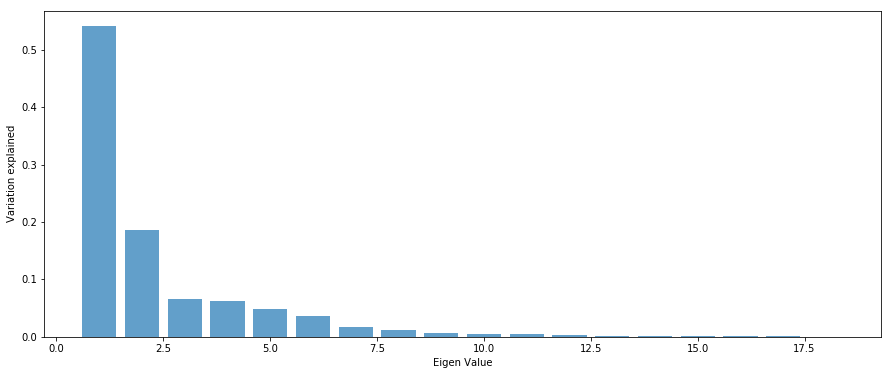

In [48]:
fig1 = plt.figure(figsize=(15,6))
plt.bar(list(range(1,19)),pca.explained_variance_ratio_,alpha=0.7, align='center')
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.show()

<b>Cummulative Variation explained vs. Eigen Values graphical representation</b>

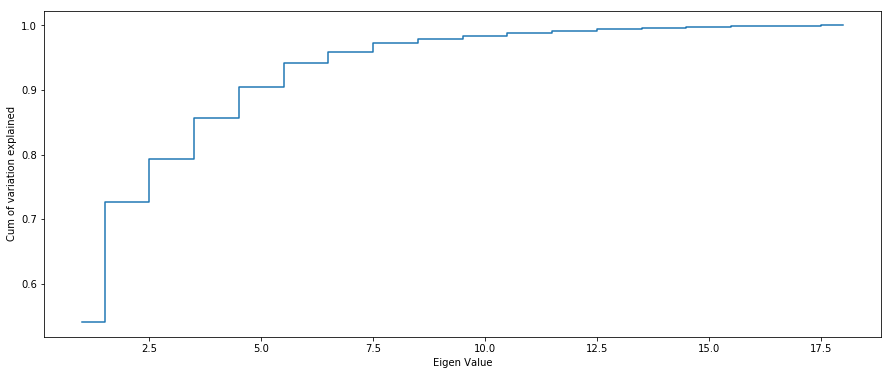

In [49]:
fig1 = plt.figure(figsize=(15,6))
plt.step(list(range(1,19)),np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('Eigen Value')
plt.show()

<b>Comment: </b> From above two graphs also I found the variance is flat after 7-8 component values. 

<b>Elbow Plotting : </b>

Text(0.5, 1.0, 'Selecting dimension with the Elbow Method')

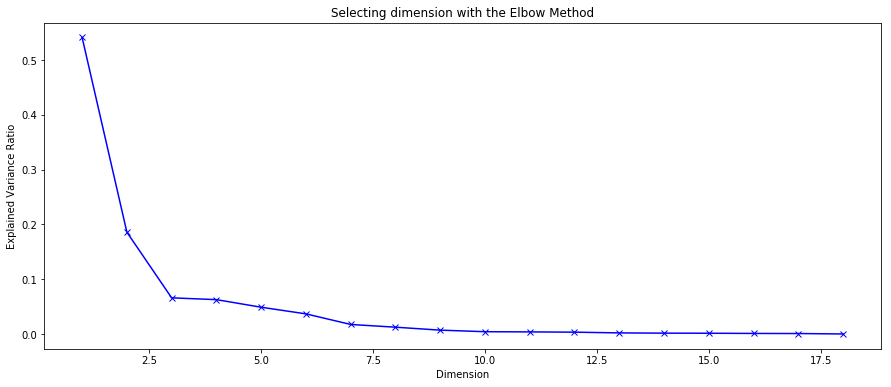

In [50]:
fig1 = plt.figure(figsize=(15,6))
plt.plot(list(range(1,19)), pca.explained_variance_ratio_, 'bx-')
plt.xlabel('Dimension')
plt.ylabel('Explained Variance Ratio')
plt.title('Selecting dimension with the Elbow Method')

<b>Comment: </b> Above graph is the elbow plot to determine the right no. of component where also I found the variance is flat after 7-8 component values. 

<b>So, I can go with component value 8 for the final PCA process.</b>

<hr/>

### Dimensionality Reduction : 

Now 8 dimensions seems very reasonable. With 8 variables we can explain over 95% of the variation in the original data!

In [51]:
# Set variable for the decided dimension
final_n_component = 8

In [52]:
# Taking the attribute count as per the decision.
pca_8_component = PCA(n_components=final_n_component)
pca_8_component.fit(XScaled)

PCA(copy=True, iterated_power='auto', n_components=8, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [53]:
print(f"Eigen Values (with {final_n_component} PCA components):")
print("===========================================")
print(pca_8_component.explained_variance_)

Eigen Values (with 8 PCA components):
[9.74940269 3.35071912 1.19238155 1.13381916 0.88399731 0.66626575
 0.31815091 0.22817914]


In [54]:
print(f"Eigen Vectors (with {final_n_component} PCA components):")
print("=================================================")
print(pca_8_component.components_)

Eigen Vectors (with 8 PCA components):
[[ 0.27250289  0.28725469  0.30242111  0.26971354  0.09786073  0.19520014
   0.31052393 -0.3090069   0.307287    0.27815416  0.29976509  0.30553237
   0.26323762 -0.04193594  0.03608321  0.05872048  0.03801314  0.08474   ]
 [-0.08704358  0.13162176 -0.04614301 -0.19793126 -0.25783995 -0.10804563
   0.07528535 -0.01322994  0.0875602   0.12215424  0.07726575  0.07150302
   0.21058205  0.50362158 -0.01576632 -0.09274624 -0.50162122 -0.50761211]
 [-0.03818521 -0.20114691  0.06346211  0.05628517 -0.06199275 -0.14895782
   0.10904283 -0.09085269  0.1060705  -0.21368469  0.1445998   0.11034374
  -0.20287019  0.07386402 -0.55917399  0.6706805  -0.06224071 -0.04170535]
 [ 0.13867501 -0.03805548  0.10895429 -0.25435509 -0.61276572  0.27867816
   0.00539295  0.06521486  0.03089915  0.04146747 -0.06400509 -0.00219687
  -0.08553965 -0.11539962  0.47370331  0.42842603 -0.0274096   0.09603749]
 [ 0.13710147 -0.13899555 -0.08001743  0.13374437  0.12360146 -0.6348

In [55]:
print(f"The percentage of variation explained by each eigen Vector (with {final_n_component} PCA components):")
print("==========================================================================================")
print(pca_8_component.explained_variance_ratio_)

The percentage of variation explained by each eigen Vector (with 8 PCA components):
[0.54099325 0.18593103 0.06616512 0.0629155  0.04905291 0.03697101
 0.01765416 0.01266163]


Applied the PCA function and determined the Eigen Values, Eigen Vectors and checked the variance ratio with decided dimension.

In [56]:
# Transforming the dataset
pca_X_set = pca_8_component.transform(XScaled)
pca_X_set

array([[ 0.58422804, -0.67567325, -0.45333356, ..., -1.84880885,
        -0.18041487, -0.68196902],
       [-1.5121798 , -0.34893367, -0.33343619, ..., -0.11831711,
         0.20330786,  0.10442512],
       [ 3.91344816,  0.2345073 , -1.26509352, ..., -0.68559401,
         0.81158817,  0.17305277],
       ...,
       [ 5.12009307, -0.18227007, -0.50836783, ...,  0.17264281,
         0.88474898, -0.38820845],
       [-3.29709502, -1.10194286,  1.93384417, ...,  0.02003876,
        -0.26057897,  0.45880709],
       [-4.96759448,  0.42274968,  1.30871531, ...,  0.38469257,
        -0.39384302, -0.21433678]])

<b> Comments: </b> Here I transformed the scaled data and saved it in variable called `pca_X_set`. Now we have out dataset after PCA process for building the model.

<hr/>

## <center><u>:: Model Building ::</u></center>

<b><u>Train and Test data spliting (Scaled Data)</u></b>

* Data spliting into train and test set with the scaled dataset

In [57]:
# data spliting using 70:30 train test data ratio and randon seeding 7
X_train, X_test, y_train, y_test = train_test_split(XScaled, y_set, test_size=0.30, random_state=7)

Split the dataframe into 70 and 30 ratio for training and testing dataset respectively. 
 * I have used `X_train, X_test, y_train, y_test` these splited variable.

<b><u>Train and Test data spliting (Scaled & PCA Data)</u></b>

* Data spliting into train and test set with the scaled and PCA dataset

In [58]:
# data spliting using 70:30 train test data ratio and randon seeding 7
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(pca_X_set, y_set, test_size=0.30, random_state=7)

Split the dataframe into 70 and 30 ratio for training and testing dataset respectively. 
 * I have used `X_pca_train, X_pca_test, y_pca_train, y_pca_test` these splited variable.

<hr>

In [59]:
results_base = []
names_base = []
target_names = ['Vans','Cars','Buses']

### <center><u>SVM (Supprot Vector Machine) Model</u></center>

#### <u>With normal scaled dataset</u>

* <b>Using Grid Search for best SVC parameters : </b>

  Using `0.01, 0.05, 0.5, 1` for C values and `'linear', 'rbf'` for kernel values

In [60]:
parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.05, 0.5, 1]}
svc = SVC(gamma="scale")
# Taking cross validation value 5
grid_search = GridSearchCV(svc, parameters, cv=5)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
print("Best SVC parameters : ")
print("===========================")
print(best_params)
svc_best_c_value = best_params['C']
svc_best_kernel_value = best_params['kernel']

Best SVC parameters : 
{'C': 1, 'kernel': 'rbf'}


<b> Comment: </b> Above code is to determine the best SVM parameter where I used `GridSearchCV` function. I found `'rbf'` is the best kernel and `1` is the best C value. So, I stored those values in variables called `svc_best_c_value` and `svc_best_kernel_value`.

* <b>Applying SVM with chosen parameters : </b>

In [61]:
# Calling SVC function for SVM
SVM_base_model = SVC(gamma='scale', C = svc_best_c_value, kernel = svc_best_kernel_value)
# Train and fitting our model
SVM_base_model.fit(X_train, y_train)

# model Scoring
SVM_base_expected = y_test
# Prediction of model from test data
SVM_base_predicted = SVM_base_model.predict(X_test)


print('Support Vector Machine Base Model:')
print('-------------------------------------------------------------------')
# Using accuracy score function for accuracy measurements
SVM_base_matrics_accuracy = metrics.accuracy_score(SVM_base_expected, SVM_base_predicted)
print(f'Matrics Accuracy Score : {round(SVM_base_matrics_accuracy*100,2)}%') 
print('-------------------------------------------------------------------')
# Evaluating the Confusion Matrics
SVM_base_confusion_metrics = metrics.confusion_matrix(SVM_base_expected, SVM_base_predicted)
print('CONFUSION MATRICS :')
print(SVM_base_confusion_metrics)

print('-------------------------------------------------------------------')

# Using classification report function for check the recall, precision and f score
print('Report : ')
SVM_base_report = metrics.classification_report(SVM_base_expected, SVM_base_predicted, output_dict=True)
print(metrics.classification_report(SVM_base_expected, SVM_base_predicted,target_names=target_names))

model_type_bus_precision = SVM_base_report['2']['precision']
model_type_car_precision = SVM_base_report['1']['precision']
model_type_van_precision = SVM_base_report['0']['precision']

model_type_bus_recall = SVM_base_report['2']['recall']
model_type_car_recall = SVM_base_report['1']['recall']
model_type_van_recall = SVM_base_report['0']['recall']

model_type_bus_fscore = SVM_base_report['2']['f1-score']
model_type_car_fscore = SVM_base_report['1']['f1-score']
model_type_van_fscore = SVM_base_report['0']['f1-score']
model_weigthed_fscore = SVM_base_report['weighted avg']['f1-score']

print('====================================================================')
print('Observation:')
print('====================================================================')
print(f'Overall Accuracy score is : {round(SVM_base_matrics_accuracy*100,2)}%')
print(f'Toward identifying the vehicle type bus the model\'s score with Precision: {round(model_type_bus_precision*100,2)}% , Recall: {round(model_type_bus_recall*100,2)}%, F1-SCORE: {round(model_type_bus_fscore*100,2)}%')
print(f'Towards identifying the vehicle type car the model\'s score with Precision: {round(model_type_car_precision*100,2)}% , Recall: {round(model_type_car_recall*100,2)}%, F1-SCORE: {round(model_type_car_fscore*100,2)}%')
print(f'Towards identifying the vehicle type van the model\'s score with Precision: {round(model_type_van_precision*100,2)}% , Recall: {round(model_type_van_recall*100,2)}%, F1-SCORE: {round(model_type_van_fscore*100,2)}%')

print(f'Weighted Avg F1-SCORE : {round(model_weigthed_fscore*100,2)} %')


print('====================================================================')
print('Cross Validation:')
print('====================================================================')

# Cross Validation 
kfold = KFold(n_splits=10, random_state=7)    
# train the model
SVM_base_cv_results = cross_val_score(SVM_base_model, X_train, y_train, cv=kfold, scoring='accuracy') 
print("%s: %f" % ('Cross Validaion Mean', SVM_base_cv_results.mean()))
print("%s: %f" % ('Cross Validation Standard Deviation', SVM_base_cv_results.std()))

SVM_compare_df = pd.DataFrame({'Dataset': ['Non-PCA'] ,'F1 Score (Weighted)' : [model_weigthed_fscore], 'Accuracy Score' : [SVM_base_matrics_accuracy], 'Cross Validation' : [SVM_base_cv_results.mean()]})
results_base.append(SVM_base_cv_results)
names_base.append('SVM')
svm_cv = str(SVM_base_cv_results.mean()) + "(" + str(SVM_base_cv_results.std()) + ")"
con_SVM_compare_df = pd.DataFrame({'Model': ['SVM'], 'Dataset with PCA' : ['No'], 'Accuracy Score' : [SVM_base_matrics_accuracy], 'F1-SCORE (Weighted Avg)' : [model_weigthed_fscore], 'Cross Validation Mean (Deviation)' : [svm_cv]})

Support Vector Machine Base Model:
-------------------------------------------------------------------
Matrics Accuracy Score : 97.64%
-------------------------------------------------------------------
CONFUSION MATRICS :
[[ 59   1   1]
 [  2 124   1]
 [  0   1  65]]
-------------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

        Vans       0.97      0.97      0.97        61
        Cars       0.98      0.98      0.98       127
       Buses       0.97      0.98      0.98        66

   micro avg       0.98      0.98      0.98       254
   macro avg       0.97      0.98      0.97       254
weighted avg       0.98      0.98      0.98       254

Observation:
Overall Accuracy score is : 97.64%
Toward identifying the vehicle type bus the model's score with Precision: 97.01% , Recall: 98.48%, F1-SCORE: 97.74%
Towards identifying the vehicle type car the model's score with Precision: 98.41% , Recall: 97.64%, F1-SCORE

<hr>

#### <u>With PCA scaled dataset</u>

* <b>Using Grid Search for best SVC parameters : </b>

  Using `0.01, 0.05, 0.5, 1` for C values and `'linear', 'rbf'` for kernel values

In [62]:
parameters = {'kernel':('linear', 'rbf'), 'C':[0.01, 0.05, 0.5, 1]}
svc = SVC(gamma="scale")
# Taking cross validation value 5
grid_search = GridSearchCV(svc, parameters, cv=5, iid=False)
grid_search.fit(X_pca_train, y_pca_train)
best_params = grid_search.best_params_
print("Best SVC parameters (PCA dataset) : ")
print("==================================")
print(best_params)
svc_pca_best_c_value = best_params['C']
svc_pca_best_kernel_value = best_params['kernel']

Best SVC parameters (PCA dataset) : 
{'C': 1, 'kernel': 'rbf'}


<b> Comment: </b> Above code is to determine the best SVM (With PCA dataset) parameter where I used `GridSearchCV` function. I found `'rbf'` is the best kernel and `1` is the best C value. So, I stored those values in variables called `svc_pca_best_c_value` and `svc_pca_best_kernel_value`.

* <b>Applying SVM with chosen parameters : </b>

In [63]:
# Calling SVC function for SVM
SVM_pca_base_model = SVC(gamma='scale', C = svc_pca_best_c_value, kernel = svc_pca_best_kernel_value)
# Train and fitting our model
SVM_pca_base_model.fit(X_pca_train, y_pca_train)

# model Scoring
SVM_pca_base_expected = y_pca_test
# Prediction of model from test data
SVM_pca_base_predicted = SVM_pca_base_model.predict(X_pca_test)


print('Support Vector Machine PCA Model:')
print('-------------------------------------------------------------------')
# Using accuracy score function for accuracy measurements
SVM_pca_base_matrics_accuracy = metrics.accuracy_score(SVM_pca_base_expected, SVM_pca_base_predicted)
print(f'Matrics Accuracy Score : {round(SVM_pca_base_matrics_accuracy*100,2)}%') 
print('-------------------------------------------------------------------')
# Evaluating the Confusion Matrics
SVM_pca_base_confusion_metrics = metrics.confusion_matrix(SVM_pca_base_expected, SVM_pca_base_predicted)
print('CONFUSION MATRICS :')
print(SVM_pca_base_confusion_metrics)

print('-------------------------------------------------------------------')

# Using classification report function for check the recall, precision and f score
print('Report : ')
SVM_pca_base_report = metrics.classification_report(SVM_pca_base_expected, SVM_pca_base_predicted, output_dict=True)
print(metrics.classification_report(SVM_pca_base_expected, SVM_pca_base_predicted,target_names=target_names))

model_type_bus_precision = SVM_pca_base_report['2']['precision']
model_type_car_precision = SVM_pca_base_report['1']['precision']
model_type_van_precision = SVM_pca_base_report['0']['precision']

model_type_bus_recall = SVM_pca_base_report['2']['recall']
model_type_car_recall = SVM_pca_base_report['1']['recall']
model_type_van_recall = SVM_pca_base_report['0']['recall']

model_type_bus_fscore = SVM_pca_base_report['2']['f1-score']
model_type_car_fscore = SVM_pca_base_report['1']['f1-score']
model_type_van_fscore = SVM_pca_base_report['0']['f1-score']
model_weigthed_fscore = SVM_pca_base_report['weighted avg']['f1-score']

print('====================================================================')
print('Observation:')
print('====================================================================')
print(f'Overall Accuracy score is : {round(SVM_pca_base_matrics_accuracy*100,2)}%')
print(f'Toward identifying the vehicle type bus the model\'s score with Precision: {round(model_type_bus_precision*100,2)}% , Recall: {round(model_type_bus_recall*100,2)}%, F1-SCORE: {round(model_type_bus_fscore*100,2)}%')
print(f'Towards identifying the vehicle type car the model\'s score with Precision: {round(model_type_car_precision*100,2)}% , Recall: {round(model_type_car_recall*100,2)}%, F1-SCORE: {round(model_type_car_fscore*100,2)}%')
print(f'Towards identifying the vehicle type van the model\'s score with Precision: {round(model_type_van_precision*100,2)}% , Recall: {round(model_type_van_recall*100,2)}%, F1-SCORE: {round(model_type_van_fscore*100,2)}%')

print(f'Weighted Avg F1-SCORE : {round(model_weigthed_fscore*100,2)} %')


print('====================================================================')
print('Cross Validation:')
print('====================================================================')

# Cross Validation 
kfold = KFold(n_splits=10, random_state=7)    
# train the model
SVM_pca_base_cv_results = cross_val_score(SVM_pca_base_model, X_pca_train, y_pca_train, cv=kfold, scoring='accuracy') 
print("%s: %f" % ('Cross Validaion Mean', SVM_pca_base_cv_results.mean()))
print("%s: %f" % ('Cross Validation Standard Deviation', SVM_pca_base_cv_results.std()))

SVM_pca_compare_df = pd.DataFrame({'Dataset': ['PCA'] ,'F1 Score (Weighted)' : [model_weigthed_fscore], 'Accuracy Score' : [SVM_pca_base_matrics_accuracy], 'Cross Validation' : [SVM_pca_base_cv_results.mean()]})
results_base.append(SVM_pca_base_cv_results)
names_base.append('SVM(PCA)')

svm_pca_cv = str(SVM_pca_base_cv_results.mean()) + "(" + str(SVM_pca_base_cv_results.std()) + ")"
con_SVM_pca_compare_df = pd.DataFrame({'Model': [""], 'Dataset with PCA' : ['Yes'], 'Accuracy Score' : [SVM_pca_base_matrics_accuracy], 'F1-SCORE (Weighted Avg)' : [model_weigthed_fscore], 'Cross Validation Mean (Deviation)' : [svm_pca_cv]})

Support Vector Machine PCA Model:
-------------------------------------------------------------------
Matrics Accuracy Score : 95.28%
-------------------------------------------------------------------
CONFUSION MATRICS :
[[ 56   3   2]
 [  4 121   2]
 [  0   1  65]]
-------------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

        Vans       0.93      0.92      0.93        61
        Cars       0.97      0.95      0.96       127
       Buses       0.94      0.98      0.96        66

   micro avg       0.95      0.95      0.95       254
   macro avg       0.95      0.95      0.95       254
weighted avg       0.95      0.95      0.95       254

Observation:
Overall Accuracy score is : 95.28%
Toward identifying the vehicle type bus the model's score with Precision: 94.2% , Recall: 98.48%, F1-SCORE: 96.3%
Towards identifying the vehicle type car the model's score with Precision: 96.8% , Recall: 95.28%, F1-SCORE: 96

#### <u>Compare SVM Classifier results in between pca and non-pca dataset</u>

In [64]:
# Creating a single dataframe and merging above dataframes into it
svm_set_compare_df = pd.DataFrame()
svm_set_compare_df = svm_set_compare_df.append(SVM_compare_df)
svm_set_compare_df = svm_set_compare_df.append(SVM_pca_compare_df)

svm_set_compare_df.head()

Dataset  F1 Score (Weighted)  Accuracy Score  Cross Validation
0  Non-PCA             0.976383        0.976378          0.947542
0      PCA             0.952672        0.952756          0.930706

<b>Comments : </b> After comparing the SVM Classifier - PCA and non PCA dataset, I can see score(F1-score, Accuracy and Cross validation Score) dropped just approx. 1%-2% with PCA. So, <b>PCA and Non-PCA method is almost equal for SVM Model.</b>

<hr>

### <center><u>Naive-Bayes Model</u></center>

#### <u>With normal scaled dataset</u>

In [65]:
# Calling Logistic function
NB_base_model = GaussianNB()
# Train and fitting our model
NB_base_model.fit(X_train, y_train)

# model Scoring
NB_base_expected = y_test
# Prediction of model from test data
NB_base_predicted = NB_base_model.predict(X_test)


print('Naive-Bayes Base Model:')
print('-------------------------------------------------------------------')
# Using accuracy score function for accuracy measurements
NB_base_matrics_accuracy = metrics.accuracy_score(NB_base_expected, NB_base_predicted)
print(f'Matrics Accuracy Score : {round(NB_base_matrics_accuracy*100,2)}%') 
print('-------------------------------------------------------------------')
# Evaluating the Confusion Matrics
NB_base_confusion_metrics = metrics.confusion_matrix(NB_base_expected, NB_base_predicted)
print('CONFUSION MATRICS :')
print(NB_base_confusion_metrics)

print('-------------------------------------------------------------------')

# Using classification report function for check the recall, precision and f score
print('Report : ')
NB_base_report = metrics.classification_report(NB_base_expected, NB_base_predicted, output_dict=True)
print(metrics.classification_report(NB_base_expected, NB_base_predicted,target_names=target_names))

model_type_bus_precision = NB_base_report['2']['precision']
model_type_car_precision = NB_base_report['1']['precision']
model_type_van_precision = NB_base_report['0']['precision']

model_type_bus_recall = NB_base_report['2']['recall']
model_type_car_recall = NB_base_report['1']['recall']
model_type_van_recall = NB_base_report['0']['recall']

model_type_bus_fscore = NB_base_report['2']['f1-score']
model_type_car_fscore = NB_base_report['1']['f1-score']
model_type_van_fscore = NB_base_report['0']['f1-score']

model_weigthed_fscore = NB_base_report['weighted avg']['f1-score']

print('====================================================================')
print('Observation:')
print('====================================================================')
print(f'Overall Accuracy score is : {round(NB_base_matrics_accuracy*100,2)}%')
print(f'Toward identifying the vehicle type bus the model\'s score with Precision: {round(model_type_bus_precision*100,2)}% , Recall: {round(model_type_bus_recall*100,2)}%, F1-SCORE: {round(model_type_bus_fscore*100,2)}%')
print(f'Towards identifying the vehicle type car the model\'s score with Precision: {round(model_type_car_precision*100,2)}% , Recall: {round(model_type_car_recall*100,2)}%, F1-SCORE: {round(model_type_car_fscore*100,2)}%')
print(f'Towards identifying the vehicle type van the model\'s score with Precision: {round(model_type_van_precision*100,2)}% , Recall: {round(model_type_van_recall*100,2)}%, F1-SCORE: {round(model_type_van_fscore*100,2)}%')

print(f'Weighted Avg F1-SCORE : {round(model_weigthed_fscore*100,2)} %')


print('====================================================================')
print('Cross Validation:')
print('====================================================================')

# Cross Validation 
kfold = KFold(n_splits=10, random_state=7)    
# train the model
NB_base_cv_results = cross_val_score(NB_base_model, X_train, y_train, cv=kfold, scoring='accuracy') 
print("%s: %f" % ('Cross Validaion Mean', NB_base_cv_results.mean()))
print("%s: %f" % ('Cross Validation Standard Deviation', NB_base_cv_results.std()))

NB_compare_df = pd.DataFrame({'Dataset': ['Non-PCA'] ,'F1 Score (Weighted)' : [model_weigthed_fscore], 'Accuracy Score' : [NB_base_matrics_accuracy], 'Cross Validation' : [NB_base_cv_results.mean()]})
results_base.append(NB_base_cv_results)
names_base.append('NB')
nb_cv = str(NB_base_cv_results.mean()) + "(" + str(NB_base_cv_results.std()) + ")"
con_NB_compare_df = pd.DataFrame({'Model': ['Naive-Bayes'], 'Dataset with PCA' : ['No'], 'Accuracy Score' : [NB_base_matrics_accuracy], 'F1-SCORE (Weighted Avg)' : [model_weigthed_fscore], 'Cross Validation Mean (Deviation)' : [nb_cv]})

Naive-Bayes Base Model:
-------------------------------------------------------------------
Matrics Accuracy Score : 60.24%
-------------------------------------------------------------------
CONFUSION MATRICS :
[[52  9  0]
 [43 82  2]
 [38  9 19]]
-------------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

        Vans       0.39      0.85      0.54        61
        Cars       0.82      0.65      0.72       127
       Buses       0.90      0.29      0.44        66

   micro avg       0.60      0.60      0.60       254
   macro avg       0.71      0.60      0.57       254
weighted avg       0.74      0.60      0.60       254

Observation:
Overall Accuracy score is : 60.24%
Toward identifying the vehicle type bus the model's score with Precision: 90.48% , Recall: 28.79%, F1-SCORE: 43.68%
Towards identifying the vehicle type car the model's score with Precision: 82.0% , Recall: 64.57%, F1-SCORE: 72.25%
Towards iden

<hr>

#### <u>With PCA scaled dataset</u>

In [66]:
# Calling Logistic function
NB_pca_base_model = GaussianNB()
# Train and fitting our model
NB_pca_base_model.fit(X_pca_train, y_pca_train)

# model Scoring
NB_pca_base_expected = y_pca_test
# Prediction of model from test data
NB_pca_base_predicted = NB_pca_base_model.predict(X_pca_test)


print('Naive-Bayes Base Model (With PCA dataset):')
print('-------------------------------------------------------------------')
# Using accuracy score function for accuracy measurements
NB_pca_base_matrics_accuracy = metrics.accuracy_score(NB_pca_base_expected, NB_pca_base_predicted)
print(f'Matrics Accuracy Score : {round(NB_pca_base_matrics_accuracy*100,2)}%') 
print('-------------------------------------------------------------------')
# Evaluating the Confusion Matrics
NB_pca_base_confusion_metrics = metrics.confusion_matrix(NB_pca_base_expected, NB_pca_base_predicted)
print('CONFUSION MATRICS :')
print(NB_pca_base_confusion_metrics)

print('-------------------------------------------------------------------')

# Using classification report function for check the recall, precision and f score
print('Report : ')
NB_pca_base_report = metrics.classification_report(NB_pca_base_expected, NB_pca_base_predicted, output_dict=True)
print(metrics.classification_report(NB_pca_base_expected, NB_pca_base_predicted,target_names=target_names))

model_type_bus_precision = NB_pca_base_report['2']['precision']
model_type_car_precision = NB_pca_base_report['1']['precision']
model_type_van_precision = NB_pca_base_report['0']['precision']

model_type_bus_recall = NB_pca_base_report['2']['recall']
model_type_car_recall = NB_pca_base_report['1']['recall']
model_type_van_recall = NB_pca_base_report['0']['recall']

model_type_bus_fscore = NB_pca_base_report['2']['f1-score']
model_type_car_fscore = NB_pca_base_report['1']['f1-score']
model_type_van_fscore = NB_pca_base_report['0']['f1-score']

model_weigthed_fscore = NB_pca_base_report['weighted avg']['f1-score']

print('====================================================================')
print('Observation:')
print('====================================================================')
print(f'Overall Accuracy score is : {round(NB_pca_base_matrics_accuracy*100,2)}%')
print(f'Toward identifying the vehicle type bus the model\'s score with Precision: {round(model_type_bus_precision*100,2)}% , Recall: {round(model_type_bus_recall*100,2)}%, F1-SCORE: {round(model_type_bus_fscore*100,2)}%')
print(f'Towards identifying the vehicle type car the model\'s score with Precision: {round(model_type_car_precision*100,2)}% , Recall: {round(model_type_car_recall*100,2)}%, F1-SCORE: {round(model_type_car_fscore*100,2)}%')
print(f'Towards identifying the vehicle type van the model\'s score with Precision: {round(model_type_van_precision*100,2)}% , Recall: {round(model_type_van_recall*100,2)}%, F1-SCORE: {round(model_type_van_fscore*100,2)}%')

print(f'Weighted Avg F1-SCORE : {round(model_weigthed_fscore*100,2)} %')


print('====================================================================')
print('Cross Validation:')
print('====================================================================')

# Cross Validation 
kfold = KFold(n_splits=10, random_state=7)    
# train the model
NB_pca_base_cv_results = cross_val_score(NB_pca_base_model, X_pca_train, y_pca_train, cv=kfold, scoring='accuracy') 
print("%s: %f" % ('Cross Validaion Mean', NB_pca_base_cv_results.mean()))
print("%s: %f" % ('Cross Validation Standard Deviation', NB_pca_base_cv_results.std()))

NB_pca_compare_df = pd.DataFrame({'Dataset': ['PCA'] ,'F1 Score (Weighted)' : [model_weigthed_fscore], 'Accuracy Score' : [NB_pca_base_matrics_accuracy], 'Cross Validation' : [NB_pca_base_cv_results.mean()]})
results_base.append(NB_pca_base_cv_results)
names_base.append('NB(PCA)')
nb_pca_cv = str(NB_pca_base_cv_results.mean()) + "(" + str(NB_pca_base_cv_results.std()) + ")"
con_NB_pca_compare_df = pd.DataFrame({'Model': [""], 'Dataset with PCA' : ['Yes'], 'Accuracy Score' : [NB_pca_base_matrics_accuracy], 'F1-SCORE (Weighted Avg)' : [model_weigthed_fscore], 'Cross Validation Mean (Deviation)' : [nb_pca_cv]})

Naive-Bayes Base Model (With PCA dataset):
-------------------------------------------------------------------
Matrics Accuracy Score : 79.53%
-------------------------------------------------------------------
CONFUSION MATRICS :
[[ 44  17   0]
 [  5 115   7]
 [ 15   8  43]]
-------------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

        Vans       0.69      0.72      0.70        61
        Cars       0.82      0.91      0.86       127
       Buses       0.86      0.65      0.74        66

   micro avg       0.80      0.80      0.80       254
   macro avg       0.79      0.76      0.77       254
weighted avg       0.80      0.80      0.79       254

Observation:
Overall Accuracy score is : 79.53%
Toward identifying the vehicle type bus the model's score with Precision: 86.0% , Recall: 65.15%, F1-SCORE: 74.14%
Towards identifying the vehicle type car the model's score with Precision: 82.14% , Recall: 90.55%, F

#### <u>Compare Naive-Bayes Classifier results in between pca and non-pca dataset</u>

In [67]:
# Creating a single dataframe and merging above dataframes into it
nb_set_compare_df = pd.DataFrame()
nb_set_compare_df = nb_set_compare_df.append(NB_compare_df)
nb_set_compare_df = nb_set_compare_df.append(NB_pca_compare_df)

nb_set_compare_df.head()

Dataset  F1 Score (Weighted)  Accuracy Score  Cross Validation
0  Non-PCA             0.603472        0.602362          0.650282
0      PCA             0.792424        0.795276          0.814124

<b>Comments : </b> After comparing the Naive-Bayes Classifier - PCA and non PCA dataset, I can see score (F1-score, Accuracy and Cross validation Score) improved by approx. 17%-20% with PCA. So, <b>PCA method is better for Naive-Bayes Model.</b>

<hr>

### <center><u>Logistic Regression Model</u></center>

#### <u>With normal scaled dataset</u>

In [68]:
# Calling Logistic function
LR_base_model = LogisticRegression(solver="lbfgs", multi_class="auto")
# Train and fitting our model
LR_base_model.fit(X_train, y_train)

# model Scoring
LR_base_expected = y_test
# Prediction of model from test data
LR_base_predicted = LR_base_model.predict(X_test)


print('Logistic Regression Base Model:')
print('-------------------------------------------------------------------')
# Using accuracy score function for accuracy measurements
LR_base_matrics_accuracy = metrics.accuracy_score(LR_base_expected, LR_base_predicted)
print(f'Matrics Accuracy Score : {round(LR_base_matrics_accuracy*100,2)}%') 
print('-------------------------------------------------------------------')
# Evaluating the Confusion Matrics
LR_base_confusion_metrics = metrics.confusion_matrix(LR_base_expected, LR_base_predicted)
print('CONFUSION MATRICS :')
print(LR_base_confusion_metrics)

print('-------------------------------------------------------------------')

# Using classification report function for check the recall, precision and f score
print('Report : ')
LR_base_report = metrics.classification_report(LR_base_expected, LR_base_predicted, output_dict=True)
print(metrics.classification_report(LR_base_expected, LR_base_predicted,target_names=target_names))

model_type_bus_precision = LR_base_report['2']['precision']
model_type_car_precision = LR_base_report['1']['precision']
model_type_van_precision = LR_base_report['0']['precision']

model_type_bus_recall = LR_base_report['2']['recall']
model_type_car_recall = LR_base_report['1']['recall']
model_type_van_recall = LR_base_report['0']['recall']

model_type_bus_fscore = LR_base_report['2']['f1-score']
model_type_car_fscore = LR_base_report['1']['f1-score']
model_type_van_fscore = LR_base_report['0']['f1-score']

model_weigthed_fscore = LR_base_report['weighted avg']['f1-score']

print('====================================================================')
print('Observation:')
print('====================================================================')
print(f'Overall Accuracy score is : {round(LR_base_matrics_accuracy*100,2)}%')
print(f'Toward identifying the vehicle type bus the model\'s score with Precision: {round(model_type_bus_precision*100,2)}% , Recall: {round(model_type_bus_recall*100,2)}%, F1-SCORE: {round(model_type_bus_fscore*100,2)}%')
print(f'Towards identifying the vehicle type car the model\'s score with Precision: {round(model_type_car_precision*100,2)}% , Recall: {round(model_type_car_recall*100,2)}%, F1-SCORE: {round(model_type_car_fscore*100,2)}%')
print(f'Towards identifying the vehicle type van the model\'s score with Precision: {round(model_type_van_precision*100,2)}% , Recall: {round(model_type_van_recall*100,2)}%, F1-SCORE: {round(model_type_van_fscore*100,2)}%')

print(f'Weighted Avg F1-SCORE : {round(model_weigthed_fscore*100,2)} %')


print('====================================================================')
print('Cross Validation:')
print('====================================================================')

# Cross Validation 
kfold = KFold(n_splits=10, random_state=7)    
# train the model
LR_base_cv_results = cross_val_score(LR_base_model, X_train, y_train, cv=kfold, scoring='accuracy') 
print("%s: %f" % ('Cross Validaion Mean', LR_base_cv_results.mean()))
print("%s: %f" % ('Cross Validation Standard Deviation', LR_base_cv_results.std()))

LR_compare_df = pd.DataFrame({'Dataset': ['Non-PCA'] ,'F1 Score (Weighted)' : [model_weigthed_fscore], 'Accuracy Score' : [LR_base_matrics_accuracy], 'Cross Validation' : [LR_base_cv_results.mean()]})
results_base.append(LR_base_cv_results)
names_base.append('LR')
lr_cv = str(LR_base_cv_results.mean()) + "(" + str(LR_base_cv_results.std()) + ")"
con_LR_compare_df = pd.DataFrame({'Model': ['Logistic Regression'], 'Dataset with PCA' : ['No'], 'Accuracy Score' : [LR_base_matrics_accuracy], 'F1-SCORE (Weighted Avg)' : [model_weigthed_fscore], 'Cross Validation Mean (Deviation)' : [lr_cv]})

Logistic Regression Base Model:
-------------------------------------------------------------------
Matrics Accuracy Score : 94.88%
-------------------------------------------------------------------
CONFUSION MATRICS :
[[ 60   1   0]
 [  2 119   6]
 [  0   4  62]]
-------------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

        Vans       0.97      0.98      0.98        61
        Cars       0.96      0.94      0.95       127
       Buses       0.91      0.94      0.93        66

   micro avg       0.95      0.95      0.95       254
   macro avg       0.95      0.95      0.95       254
weighted avg       0.95      0.95      0.95       254

Observation:
Overall Accuracy score is : 94.88%
Toward identifying the vehicle type bus the model's score with Precision: 91.18% , Recall: 93.94%, F1-SCORE: 92.54%
Towards identifying the vehicle type car the model's score with Precision: 95.97% , Recall: 93.7%, F1-SCORE: 94

<hr>

#### <u>With PCA scaled dataset</u>

In [69]:
# Calling Logistic function
LR_pca_base_model = LogisticRegression(solver="lbfgs", multi_class="auto")
# Train and fitting our model
LR_pca_base_model.fit(X_pca_train, y_pca_train)

# model Scoring
LR_pca_base_expected = y_pca_test
# Prediction of model from test data
LR_pca_base_predicted = LR_pca_base_model.predict(X_pca_test)


print('Logistic Regression Base Model (With PCA dataset):')
print('-------------------------------------------------------------------')
# Using accuracy score function for accuracy measurements
LR_pca_base_matrics_accuracy = metrics.accuracy_score(LR_pca_base_expected, LR_pca_base_predicted)
print(f'Matrics Accuracy Score : {round(LR_pca_base_matrics_accuracy*100,2)}%') 
print('-------------------------------------------------------------------')
# Evaluating the Confusion Matrics
LR_pca_base_confusion_metrics = metrics.confusion_matrix(LR_pca_base_expected, LR_pca_base_predicted)
print('CONFUSION MATRICS :')
print(LR_pca_base_confusion_metrics)

print('-------------------------------------------------------------------')

# Using classification report function for check the recall, precision and f score
print('Report : ')
LR_pca_base_report = metrics.classification_report(LR_pca_base_expected, LR_pca_base_predicted, output_dict=True)
print(metrics.classification_report(LR_pca_base_expected, LR_pca_base_predicted,target_names=target_names))

model_type_bus_precision = LR_pca_base_report['2']['precision']
model_type_car_precision = LR_pca_base_report['1']['precision']
model_type_van_precision = LR_pca_base_report['0']['precision']

model_type_bus_recall = LR_pca_base_report['2']['recall']
model_type_car_recall = LR_pca_base_report['1']['recall']
model_type_van_recall = LR_pca_base_report['0']['recall']

model_type_bus_fscore = LR_pca_base_report['2']['f1-score']
model_type_car_fscore = LR_pca_base_report['1']['f1-score']
model_type_van_fscore = LR_pca_base_report['0']['f1-score']

model_weigthed_fscore = LR_pca_base_report['weighted avg']['f1-score']

print('====================================================================')
print('Observation:')
print('====================================================================')
print(f'Overall Accuracy score is : {round(LR_pca_base_matrics_accuracy*100,2)}%')
print(f'Toward identifying the vehicle type bus the model\'s score with Precision: {round(model_type_bus_precision*100,2)}% , Recall: {round(model_type_bus_recall*100,2)}%, F1-SCORE: {round(model_type_bus_fscore*100,2)}%')
print(f'Towards identifying the vehicle type car the model\'s score with Precision: {round(model_type_car_precision*100,2)}% , Recall: {round(model_type_car_recall*100,2)}%, F1-SCORE: {round(model_type_car_fscore*100,2)}%')
print(f'Towards identifying the vehicle type van the model\'s score with Precision: {round(model_type_van_precision*100,2)}% , Recall: {round(model_type_van_recall*100,2)}%, F1-SCORE: {round(model_type_van_fscore*100,2)}%')

print(f'Weighted Avg F1-SCORE : {round(model_weigthed_fscore*100,2)} %')


print('====================================================================')
print('Cross Validation:')
print('====================================================================')

# Cross Validation 
kfold = KFold(n_splits=10, random_state=7)    
# train the model
LR_pca_base_cv_results = cross_val_score(LR_pca_base_model, X_pca_train, y_pca_train, cv=kfold, scoring='accuracy') 
print("%s: %f" % ('Cross Validaion Mean', LR_pca_base_cv_results.mean()))
print("%s: %f" % ('Cross Validation Standard Deviation', LR_pca_base_cv_results.std()))

LR_pca_compare_df = pd.DataFrame({'Dataset': ['PCA'] ,'F1 Score (Weighted)' : [model_weigthed_fscore], 'Accuracy Score' : [LR_pca_base_matrics_accuracy], 'Cross Validation' : [LR_pca_base_cv_results.mean()]})
results_base.append(LR_pca_base_cv_results)
names_base.append('LR(PCA)')
lr_pca_cv = str(LR_pca_base_cv_results.mean()) + "(" + str(LR_pca_base_cv_results.std()) + ")"
con_LR_pca_compare_df = pd.DataFrame({'Model': [''], 'Dataset with PCA' : ['Yes'], 'Accuracy Score' : [LR_pca_base_matrics_accuracy], 'F1-SCORE (Weighted Avg)' : [model_weigthed_fscore], 'Cross Validation Mean (Deviation)' : [lr_pca_cv]})

Logistic Regression Base Model (With PCA dataset):
-------------------------------------------------------------------
Matrics Accuracy Score : 88.19%
-------------------------------------------------------------------
CONFUSION MATRICS :
[[ 55   4   2]
 [  5 113   9]
 [  1   9  56]]
-------------------------------------------------------------------
Report : 
              precision    recall  f1-score   support

        Vans       0.90      0.90      0.90        61
        Cars       0.90      0.89      0.89       127
       Buses       0.84      0.85      0.84        66

   micro avg       0.88      0.88      0.88       254
   macro avg       0.88      0.88      0.88       254
weighted avg       0.88      0.88      0.88       254

Observation:
Overall Accuracy score is : 88.19%
Toward identifying the vehicle type bus the model's score with Precision: 83.58% , Recall: 84.85%, F1-SCORE: 84.21%
Towards identifying the vehicle type car the model's score with Precision: 89.68% , Recall: 

#### <u>Compare Logistic Regression Classifier results in between pca and non-pca dataset</u>

In [70]:
# Creating a single dataframe and merging above dataframes into it
lr_set_compare_df = pd.DataFrame()
lr_set_compare_df = lr_set_compare_df.append(LR_compare_df)
lr_set_compare_df = lr_set_compare_df.append(LR_pca_compare_df)

lr_set_compare_df.head()

Dataset  F1 Score (Weighted)  Accuracy Score  Cross Validation
0  Non-PCA             0.948855        0.948819          0.934011
0      PCA             0.881991        0.881890          0.844407

<b>Comments : </b> After comparing the Logistic Classifier - PCA and non PCA dataset, I can see score (F1-score, Accuracy and Cross validation Score) dropped by aprox. 6%-8% with PCA. So, <b>Non-PCA method is better for Logistic Model.</b>

<hr>

##### <u>All Model Performance Comparison</u>

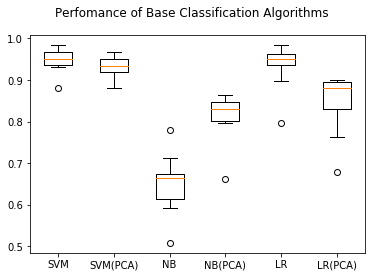

In [71]:
fig = plt.figure()
fig.suptitle('Perfomance of Base Classification Algorithms')
ax = fig.add_subplot(111)
plt.boxplot(results_base)
ax.set_xticklabels(names_base)
plt.show()

<b>Comments : </b> The above boxplot graph represent the scoring of the executed models. It's clear that <b>SVM</b> is the top scoring model.

* SVM Score (Non-PCA): 97.63%
* SVM Score (PCA): 95.27%

<hr>

### <center>:: Conclusion ::</center>

###### <u>Below is the comparision between the evaluated model scores</u> 

In [72]:
# Creating a single dataframe and merging above dataframes into it
final_compare_df = pd.DataFrame()
final_compare_df = final_compare_df.append(con_SVM_compare_df)
final_compare_df = final_compare_df.append(con_SVM_pca_compare_df)
final_compare_df = final_compare_df.append(con_NB_compare_df)
final_compare_df = final_compare_df.append(con_NB_pca_compare_df)
final_compare_df = final_compare_df.append(con_LR_compare_df)
final_compare_df = final_compare_df.append(con_LR_pca_compare_df)

final_compare_df.head(10)

Model Dataset with PCA  Accuracy Score  \
0                  SVM               No        0.976378   
0                                   Yes        0.952756   
0          Naive-Bayes               No        0.602362   
0                                   Yes        0.795276   
0  Logistic Regression               No        0.948819   
0                                   Yes        0.881890   

   F1-SCORE (Weighted Avg)         Cross Validation Mean (Deviation)  
0                 0.976383   0.9475423728813558(0.02682278881965555)  
0                 0.952672  0.9307062146892655(0.028877753349487504)  
0                 0.603472   0.6502824858757063(0.06889181304730121)  
0                 0.792424   0.8141242937853107(0.05535007805303326)  
0                 0.948855   0.9340112994350281(0.05058945845253845)  
0                 0.881991    0.8444067796610171(0.0692422150395222)

I can see from the above table that `SVM Model with non PCA dataset` has the best `Accuracy  : 97.63%` and `Weighted Avg : 97.63%` and cross validation score `0.9475` with deviation `0.026`.

Simulteneously, I can see the `SVM Model with PCA dataset` has also good `Accuracy  : 95.27%` and `Weighted Avg : 95.26%` and cross validation score `0.9307` with deviation `0.028`.

### Checking the AUC (Area Under Curve) value with OneVsRestClassifier:

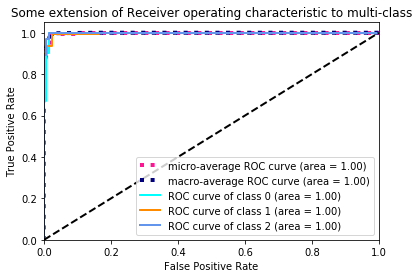

In [73]:
y_classes = label_binarize(dataset_df['class'], classes=[0, 1, 2])
n_classes = y_classes.shape[1]



# shuffle and split training and test sets
X_train_, X_test_, y_train_, y_test_ = train_test_split(XScaled, y_classes, test_size=0.30, random_state=7)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(SVC(gamma="scale", kernel='rbf', probability=True,random_state=7))
y_score = classifier.fit(X_train_, y_train_).decision_function(X_test_)

lw = 2
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test_[:, i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test_.ravel(), y_score.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

    
    
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

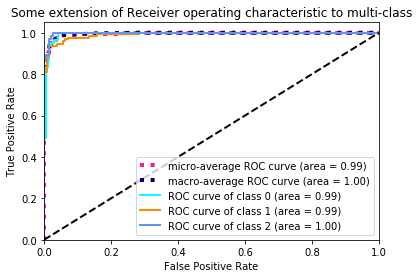

In [74]:
y_classes = label_binarize(dataset_df['class'], classes=[0, 1, 2])
n_classes = y_classes.shape[1]



# shuffle and split training and test sets
X_train_, X_test_, y_train_, y_test_ = train_test_split(pca_X_set, y_classes, test_size=0.30, random_state=7)

# Learn to predict each class against the other
classifier = OneVsRestClassifier(SVC(gamma="scale", kernel='rbf', probability=True,random_state=7))
y_score = classifier.fit(X_train_, y_train_).decision_function(X_test_)

lw = 2
# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = metrics.roc_curve(y_test_[:, i], y_score[:, i])
    roc_auc[i] = metrics.auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = metrics.roc_curve(y_test_.ravel(), y_score.ravel())
roc_auc["micro"] = metrics.auc(fpr["micro"], tpr["micro"])

    
    
# Compute macro-average ROC curve and ROC area

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = metrics.auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(fpr["micro"], tpr["micro"],
         label='micro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["micro"]),
         color='deeppink', linestyle=':', linewidth=4)

plt.plot(fpr["macro"], tpr["macro"],
         label='macro-average ROC curve (area = {0:0.2f})'
               ''.format(roc_auc["macro"]),
         color='navy', linestyle=':', linewidth=4)

colors = cycle(['aqua', 'darkorange', 'cornflowerblue'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Some extension of Receiver operating characteristic to multi-class')
plt.legend(loc="lower right")
plt.show()

From the above graph of Area Under Curve I found the SVM(With PCA) Model is better than other model.

Lets evaluate the Confusion Matrics Once Again

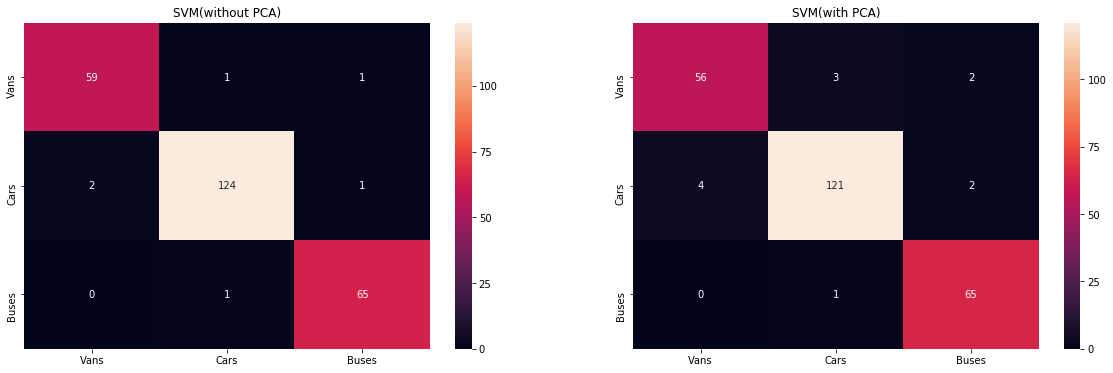

In [75]:
df_svm_non_pca = pd.DataFrame(SVM_base_confusion_metrics, index = [i for i in ["Vans","Cars","Buses"]], columns = [i for i in ["Vans","Cars","Buses"]])
cfFig = plt.figure(figsize = (20,6))
cfFig.add_subplot(1,2,1)
sns.heatmap(df_svm_non_pca, annot=True ,fmt='g')
plt.title('SVM(without PCA)')

df_svm_pca = pd.DataFrame(SVM_pca_base_confusion_metrics, index = [i for i in ["Vans","Cars","Buses"]], columns = [i for i in ["Vans","Cars","Buses"]])
cfFig.add_subplot(1,2,2)
sns.heatmap(df_svm_pca, annot=True ,fmt='g')
plt.title('SVM(with PCA)')
plt.show()

After analyzing the confusion matrics, I see the facts below :

<b><u>SVM Model(Without PCA dataset)</u></b>

Our model correctly predicted the vans as vans category is <b>59</b> but wrongly predicted <b>1</b> as cars and <b>1</b> as bus.
Also predicted the Cars as car category is <b>124</b> but wrongly predicted <b>2</b> as vans and <b>1</b> as bus. And predicted the Buses as bus category is <b>65</b> but wrongly predicted <b>1</b> as cars.


<b><u>SVM Model(With PCA dataset)</u></b>

Our model correctly predicted the vans as vans category is <b>56</b> but wrongly predicted <b>3</b> as cars and <b>2</b> as bus.
Also predicted the Cars as car category is <b>121</b> but wrongly predicted <b>4</b> as vans and <b>2</b> as bus. And predicted the Buses as bus category is <b>65</b> but wrongly predicted <b>1</b> as cars.


<hr>
Towards the end I can say that after checking the dataset, correlation in between the attributes, we applied the PCA method on the dataset to reduce the dimension. Then created the different models like SVM, Naive-Bayes, Logistic Regression and applied those on both dataset, 1. With PCA applied dataset , 2) Without PCA applied Dataset. I found SVM model scored the best among others.

Now while comparing the SVM models for both with PCA and without PCA I got the without PCA model is more accurate then the with PCA dataset model. Score is `97.63%`. <b>Difference is approximately 1%</b>. 

<b>But keeping a factor in mind that, After reducing 10 dimensions from 18 to 8, we got approx. 1% accuracy drop only `95.27%` for the with PCA dataset SVM model. And that's comparatively pretty good score.</b>



### <center>============================ X ============================</center>